### Importing the libraries and setting options

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn import preprocessing
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
pd.set_option('display.max_columns', None)
import warnings
warnings.filterwarnings('ignore')
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import VarianceThreshold, SelectKBest, chi2
from sklearn.preprocessing import KBinsDiscretizer
from sklearn import metrics
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn import tree


### Importing and Reading the data

In [2]:
d4Hotel = pd.read_csv(r'C:\Users\Vikas\Documents\Computer Learning\Data Science and AI Machine Learning\Hands On ML DL and NLP projects and reading materials\Hotel Booking Prediction\hotel_bookings.csv')

In [3]:
d4Hotel.head()

,hotel,is_canceled,lead_time,arrival_month_year,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,July 2015,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,01-07-2015
1,Resort Hotel,0,737,July 2015,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,01-07-2015
2,Resort Hotel,0,7,July 2015,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,02-07-2015
3,Resort Hotel,0,13,July 2015,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,02-07-2015
4,Resort Hotel,0,14,July 2015,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,03-07-2015


In [4]:
d4Hotel.tail()

,hotel,is_canceled,lead_time,arrival_month_year,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
119385,City Hotel,0,23,August 2017,2017,August,35,30,2,5,2,0.0,0,BB,BEL,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,06-09-2017
119386,City Hotel,0,102,August 2017,2017,August,35,31,2,5,3,0.0,0,BB,FRA,Online TA,TA/TO,0,0,0,E,E,0,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,07-09-2017
119387,City Hotel,0,34,August 2017,2017,August,35,31,2,5,2,0.0,0,BB,DEU,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,07-09-2017
119388,City Hotel,0,109,August 2017,2017,August,35,31,2,5,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,07-09-2017
119389,City Hotel,0,205,August 2017,2017,August,35,29,2,7,2,0.0,0,HB,DEU,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,9.0,NaN,0,Transient,151.20,0,2,Check-Out,07-09-2017


In [5]:
d4Hotel.shape

(119390, 33)

In [6]:
d4Hotel.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [7]:
d4Hotel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 33 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_month_year              119390 non-null  object 
 4   arrival_date_year               119390 non-null  int64  
 5   arrival_date_month              119390 non-null  object 
 6   arrival_date_week_number        119390 non-null  int64  
 7   arrival_date_day_of_month       119390 non-null  int64  
 8   stays_in_weekend_nights         119390 non-null  int64  
 9   stays_in_week_nights            119390 non-null  int64  
 10  adults                          119390 non-null  int64  
 11  children                        119386 non-null  float64
 12  babies          

In [8]:
corrmat = round(d4Hotel.corr(),2)
print(corrmat)
print(corrmat.shape)

                                is_canceled  lead_time  arrival_date_year  \
is_canceled                            1.00       0.29               0.02   
lead_time                              0.29       1.00               0.04   
arrival_date_year                      0.02       0.04               1.00   
arrival_date_week_number               0.01       0.13              -0.54   
arrival_date_day_of_month             -0.01       0.00              -0.00   
stays_in_weekend_nights               -0.00       0.09               0.02   
stays_in_week_nights                   0.02       0.17               0.03   
adults                                 0.06       0.12               0.03   
children                               0.01      -0.04               0.05   
babies                                -0.03      -0.02              -0.01   
is_repeated_guest                     -0.08      -0.12               0.01   
previous_cancellations                 0.11       0.09              -0.12   

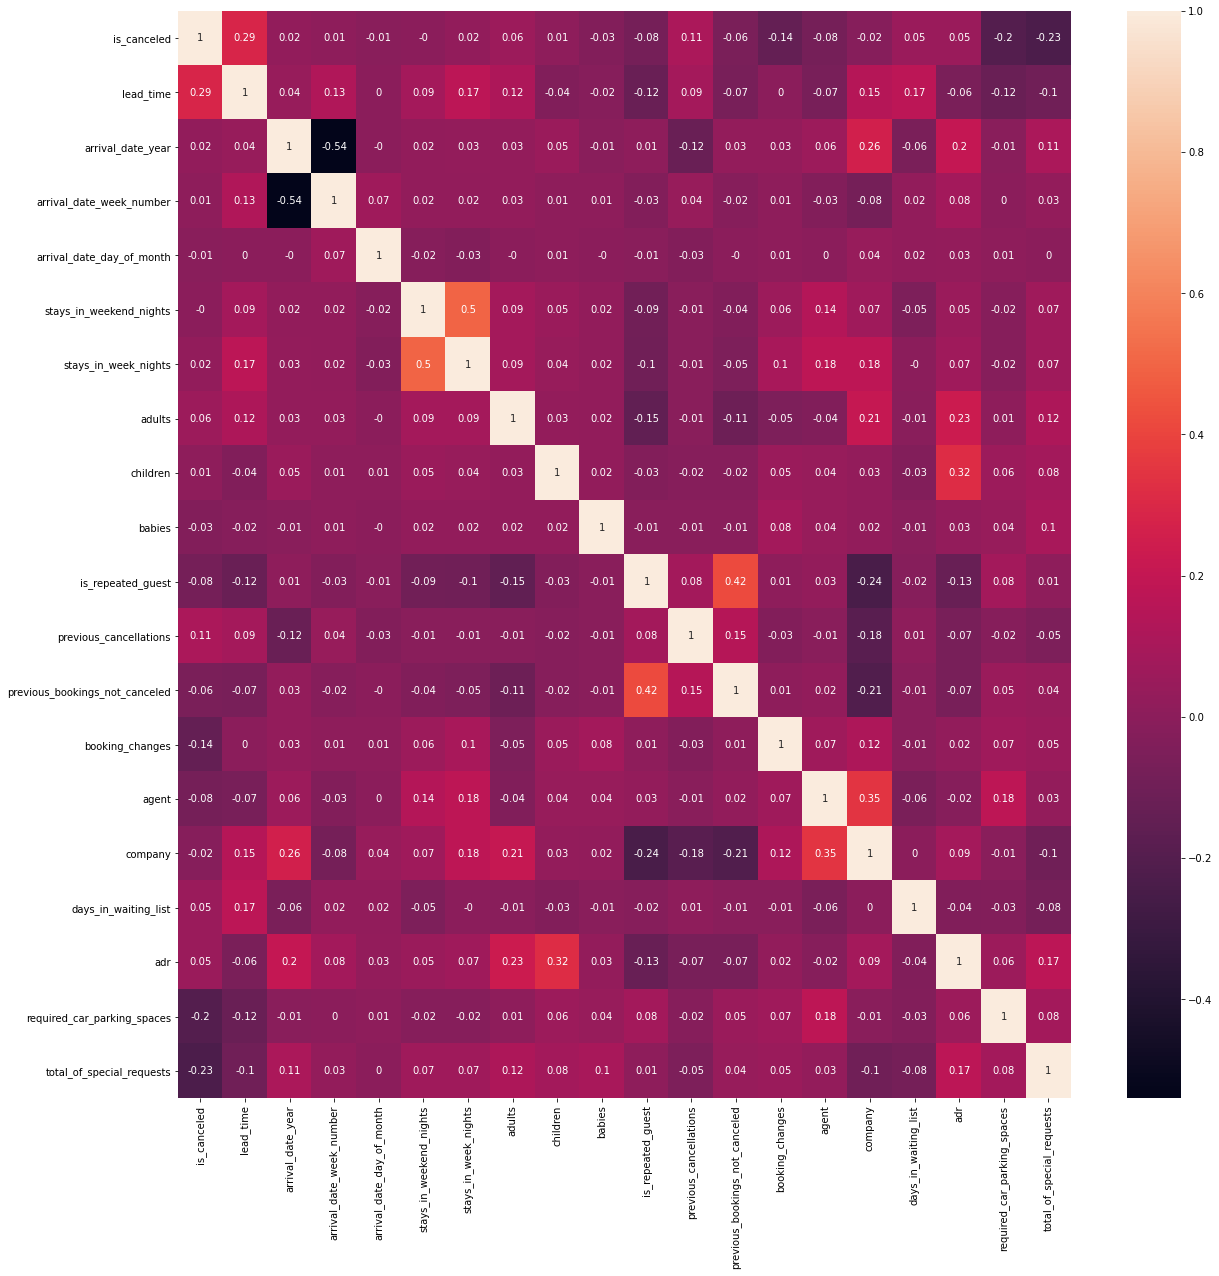

In [9]:
plt.figure(figsize = (20,20))
sns.heatmap(data=corrmat, annot = True)

plt.show()

#### Observations

##### None of the continuous variables show significant correlation. 
##### The fact that even the target variable (is_canceled) doesnt show much correlation to any of the independent variables is intriguing and may clue us into the fact that a regression model may not be the best performing model on this data set. Let's see if this assumption turns out to be true.

In [10]:
d4Hotel.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_month_year                     0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent           

In [11]:
d4Hotel['is_canceled'].value_counts()

0    75166
1    44224
Name: is_canceled, dtype: int64

In [12]:
d4Hotel['is_canceled'].mean()

0.37041628277075134

In [13]:
cancel_rate1 = d4Hotel['is_canceled'].mean()
print(f'Overall cancellation rate is : {(round(cancel_rate1,2)*100)}%.')

Overall cancellation rate is : 37.0%.


In [14]:
# Analyze the data in the company column since missing values are very high

company_isnull = d4Hotel['company'].isnull().sum()/d4Hotel.shape[0]
print(company_isnull)
cancel_by_company = pd.crosstab(index = d4Hotel['company'], columns = d4Hotel['is_canceled']).reset_index()
# print(cancel_by_company)
print(cancel_by_company[0].max())
comp_max = cancel_by_company[0].idxmax()
print(cancel_by_company.iloc[comp_max])
cancel_by_company['comp_cancel_rate'] = cancel_by_company[1]/(cancel_by_company[0]+cancel_by_company[1]) 
print(cancel_by_company)
cancel_rate = cancel_by_company[cancel_by_company['comp_cancel_rate'] > 0.37]
print(cancel_rate)
print(cancel_rate.shape)

0.943068933746545
850
is_canceled
company     40.0
0          850.0
1           77.0
Name: 20, dtype: float64
is_canceled  company   0  1  comp_cancel_rate
0                6.0   1  0          0.000000
1                8.0   1  0          0.000000
2                9.0  34  3          0.081081
3               10.0   1  0          0.000000
4               11.0   1  0          0.000000
..               ...  .. ..               ...
347            531.0   0  1          1.000000
348            534.0   2  0          0.000000
349            539.0   2  0          0.000000
350            541.0   1  0          0.000000
351            543.0   0  2          1.000000

[352 rows x 4 columns]
is_canceled  company   0    1  comp_cancel_rate
17              37.0   0   10          1.000000
22              43.0  11   18          0.620690
26              48.0   0    5          1.000000
37              67.0  92  175          0.655431
43              77.0   0    1          1.000000
50              85.0   1  

### Observation of null values

#### 1. Missing 'Agency' values are about 14% of total values. We can assume that where no agency provided customer approached the hotel directly and the value can be filled with 0. 
#### 2. Missing values of 'Children' is 4 and 'Country' is 488 out of total 116,000+ values. It is probably an oversight while registering the customer but can be safely filled with '0' children and 'unknown' country without affecting the model much, if at all. 
#### 3. Missing values for company is a whopping 94%. On analyzing the data for cancellation rate by company (from whatever data is available), there are only 35 rows where the cancellation rate is higher than the average cancellation rate. Of these 35 most are 1 ~ 5 person bookings. 12 rows had significant number of bookings and high cancellation rates. However, 12 rows on a total of 116,000+ rows does not justify imputing 94% missing values and using the result in the model. Moreover, the values in company column are float numbers(so probably an ID number for the company) and will affect any regression models in an unpredictable fashion. 

#### Running the model by dropping the company column. If model does not perform well, may revisit adding back the company column and/or with company names instead of float numbers. 


##### Code below not used for imputation due to above observations.

In [15]:
# imputer = SimpleImputer(missing_values = np.nan, strategy = 'most_frequent')
# d4Hotel_imptd = pd.DataFrame(imputer.fit_transform(d4Hotel), index = d4Hotel.index, columns = d4Hotel.columns)
# d4Hotel_imptd.isnull().sum()

### Data Pre-Processing

In [16]:
d4Hotel.drop('company', axis=1,inplace=True)
print(d4Hotel.shape)

(119390, 32)


In [17]:
nullV_replacements = {"children": 0,"country": "Unknown", "agent": 0}
d4Hotel.fillna(nullV_replacements, inplace=True)

# 'meal' contains values 'undefined' which is the same as 'SC'
d4Hotel['meal'].replace('Undefined', 'SC', inplace=True)

d4Hotel.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_month_year                0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
days_in_waiting_list              0
customer_type                     0
adr                         

In [18]:
d4Hotel['hotel'].value_counts()

City Hotel      79330
Resort Hotel    40060
Name: hotel, dtype: int64

In [19]:
d4Hotel['is_canceled'].dtypes

dtype('int64')

In [20]:
d4Hotel.rename(columns = {'is_canceled': 'Target'}, inplace=True)

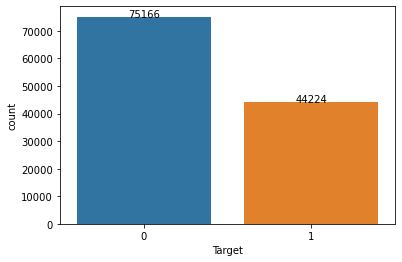

In [21]:
is_canceled = sns.countplot(data = d4Hotel, x = 'Target')


i=0
for p in is_canceled.patches:
    height = p.get_height()
    is_canceled.text(p.get_x()+p.get_width()/2, height + 0.1,
                             d4Hotel.Target.value_counts(ascending=True)[i], ha="center")
    i +=1

plt.show()

['hotel', 'arrival_month_year', 'arrival_date_month', 'meal', 'market_segment', 'distribution_channel', 'reserved_room_type', 'assigned_room_type', 'deposit_type', 'customer_type', 'reservation_status', 'country', 'is_repeated_guest', 'stays_in_weekend_nights', 'stays_in_week_nights', 'previous_cancellations', 'booking_changes', 'total_of_special_requests']


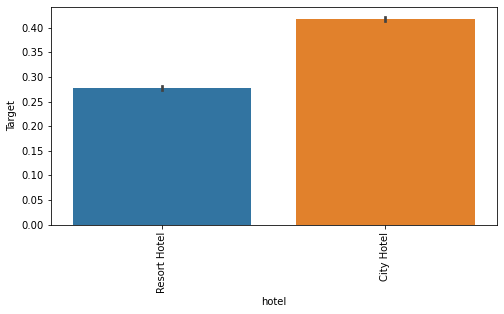

Mean 
 hotel
City Hotel      0.417270
Resort Hotel    0.277634
Name: Target, dtype: float64 
 

Count 
 hotel
City Hotel      79330
Resort Hotel    40060
Name: Target, dtype: int64


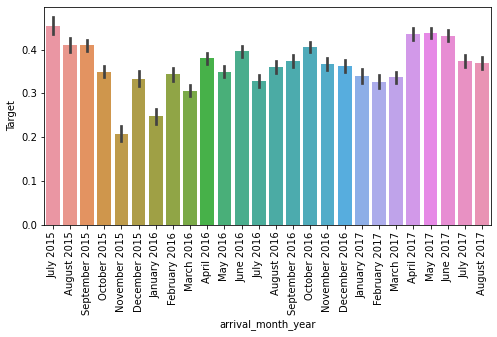

Mean 
 arrival_month_year
April 2016        0.379698
April 2017        0.435082
August 2015       0.410903
August 2016       0.360458
August 2017       0.368731
December 2015     0.333219
December 2016     0.362176
February 2016     0.343613
February 2017     0.325353
January 2016      0.247776
January 2017      0.339582
July 2015         0.453530
July 2016         0.327865
July 2017         0.373424
June 2016         0.396070
June 2017         0.431911
March 2016        0.306177
March 2017        0.336419
May 2016          0.349580
May 2017          0.437510
November 2015     0.207692
November 2016     0.367310
October 2015      0.349405
October 2016      0.405288
September 2015    0.409464
September 2016    0.374861
Name: Target, dtype: float64 
 

Count 
 arrival_month_year
April 2016        5428
April 2017        5661
August 2015       3889
August 2016       5063
August 2017       4925
December 2015     2920
December 2016     3860
February 2016     3891
February 2017     4177
Janua

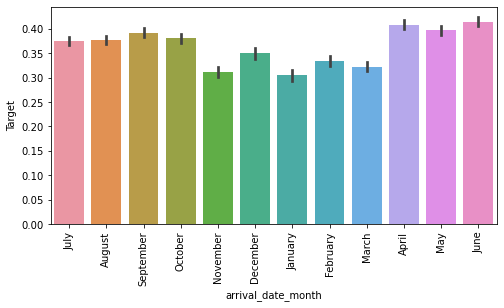

Mean 
 arrival_date_month
April        0.407972
August       0.377531
December     0.349705
February     0.334160
January      0.304773
July         0.374536
June         0.414572
March        0.321523
May          0.396658
November     0.312334
October      0.380466
September    0.391702
Name: Target, dtype: float64 
 

Count 
 arrival_date_month
April        11089
August       13877
December      6780
February      8068
January       5929
July         12661
June         10939
March         9794
May          11791
November      6794
October      11160
September    10508
Name: Target, dtype: int64


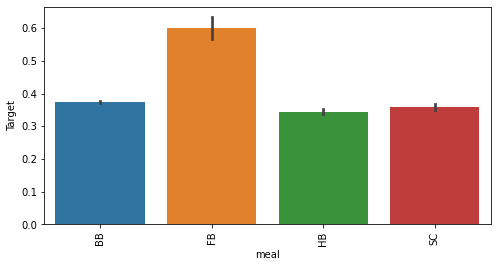

Mean 
 meal
BB    0.373849
FB    0.598997
HB    0.344603
SC    0.359760
Name: Target, dtype: float64 
 

Count 
 meal
BB    92310
FB      798
HB    14463
SC    11819
Name: Target, dtype: int64


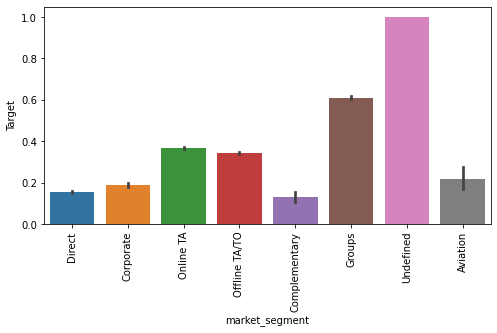

Mean 
 market_segment
Aviation         0.219409
Complementary    0.130552
Corporate        0.187347
Direct           0.153419
Groups           0.610620
Offline TA/TO    0.343160
Online TA        0.367211
Undefined        1.000000
Name: Target, dtype: float64 
 

Count 
 market_segment
Aviation           237
Complementary      743
Corporate         5295
Direct           12606
Groups           19811
Offline TA/TO    24219
Online TA        56477
Undefined            2
Name: Target, dtype: int64


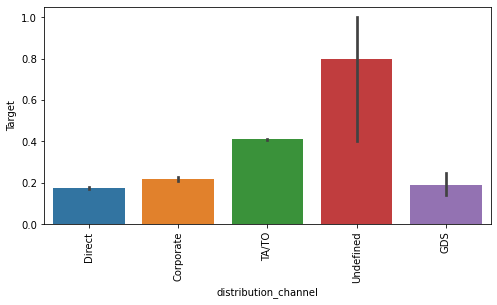

Mean 
 distribution_channel
Corporate    0.220758
Direct       0.174599
GDS          0.191710
TA/TO        0.410259
Undefined    0.800000
Name: Target, dtype: float64 
 

Count 
 distribution_channel
Corporate     6677
Direct       14645
GDS            193
TA/TO        97870
Undefined        5
Name: Target, dtype: int64


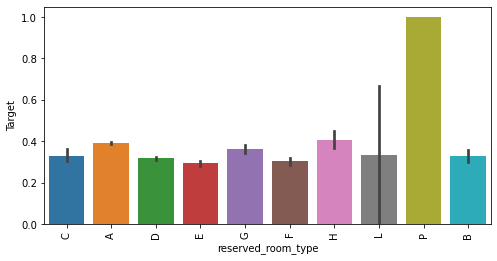

Mean 
 reserved_room_type
A    0.391074
B    0.329159
C    0.330472
D    0.317796
E    0.292884
F    0.303763
G    0.364374
H    0.407654
L    0.333333
P    1.000000
Name: Target, dtype: float64 
 

Count 
 reserved_room_type
A    85994
B     1118
C      932
D    19201
E     6535
F     2897
G     2094
H      601
L        6
P       12
Name: Target, dtype: int64


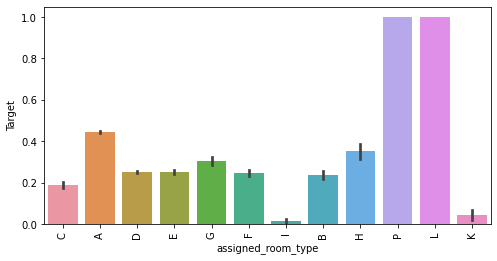

Mean 
 assigned_room_type
A    0.444925
B    0.236708
C    0.187789
D    0.251244
E    0.252114
F    0.247134
G    0.305523
H    0.352528
I    0.013774
K    0.043011
L    1.000000
P    1.000000
Name: Target, dtype: float64 
 

Count 
 assigned_room_type
A    74053
B     2163
C     2375
D    25322
E     7806
F     3751
G     2553
H      712
I      363
K      279
L        1
P       12
Name: Target, dtype: int64


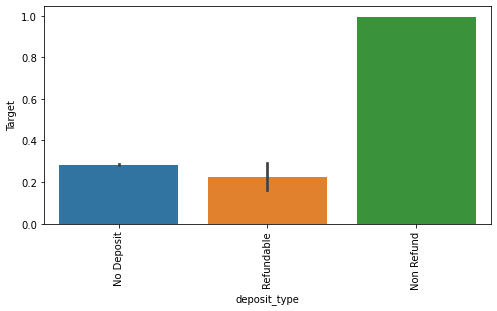

Mean 
 deposit_type
No Deposit    0.283770
Non Refund    0.993624
Refundable    0.222222
Name: Target, dtype: float64 
 

Count 
 deposit_type
No Deposit    104641
Non Refund     14587
Refundable       162
Name: Target, dtype: int64


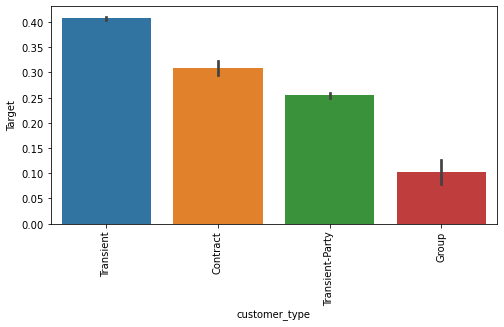

Mean 
 customer_type
Contract           0.309617
Group              0.102253
Transient          0.407463
Transient-Party    0.254299
Name: Target, dtype: float64 
 

Count 
 customer_type
Contract            4076
Group                577
Transient          89613
Transient-Party    25124
Name: Target, dtype: int64


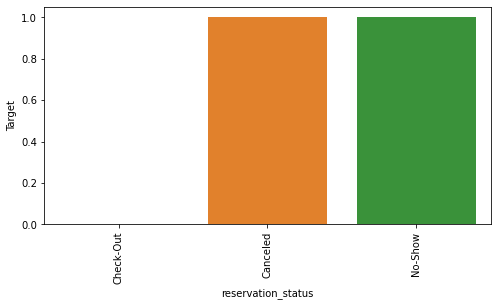

Mean 
 reservation_status
Canceled     1
Check-Out    0
No-Show      1
Name: Target, dtype: int64 
 

Count 
 reservation_status
Canceled     43017
Check-Out    75166
No-Show       1207
Name: Target, dtype: int64


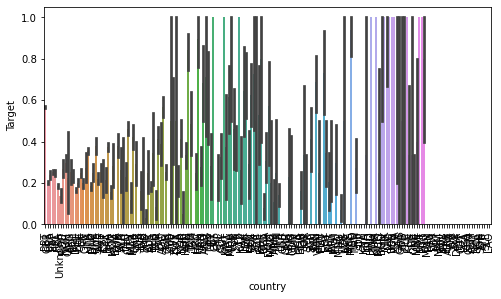

Mean 
 country
ABW    0.000000
AGO    0.566298
AIA    0.000000
ALB    0.166667
AND    0.714286
         ...   
VGB    1.000000
VNM    0.250000
ZAF    0.387500
ZMB    0.500000
ZWE    0.500000
Name: Target, Length: 178, dtype: float64 
 

Count 
 country
ABW      2
AGO    362
AIA      1
ALB     12
AND      7
      ... 
VGB      1
VNM      8
ZAF     80
ZMB      2
ZWE      4
Name: Target, Length: 178, dtype: int64


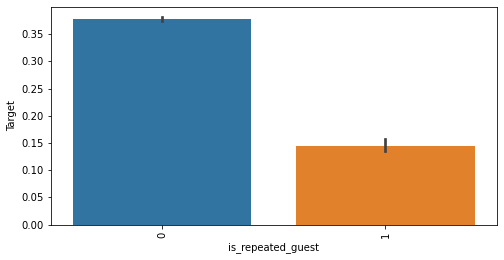

Mean 
 is_repeated_guest
0    0.377851
1    0.144882
Name: Target, dtype: float64 
 

Count 
 is_repeated_guest
0    115580
1      3810
Name: Target, dtype: int64


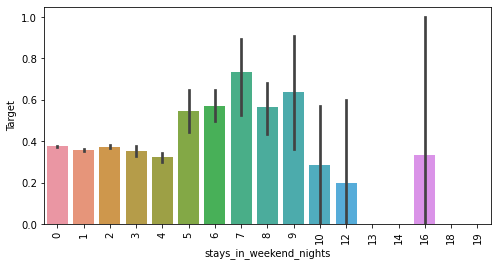

Mean 
 stays_in_weekend_nights
0     0.375034
1     0.359401
2     0.374835
3     0.352661
4     0.322372
5     0.544304
6     0.568627
7     0.736842
8     0.566667
9     0.636364
10    0.285714
12    0.200000
13    0.000000
14    0.000000
16    0.333333
18    0.000000
19    0.000000
Name: Target, dtype: float64 
 

Count 
 stays_in_weekend_nights
0     51998
1     30626
2     33308
3      1259
4      1855
5        79
6       153
7        19
8        60
9        11
10        7
12        5
13        3
14        2
16        3
18        1
19        1
Name: Target, dtype: int64


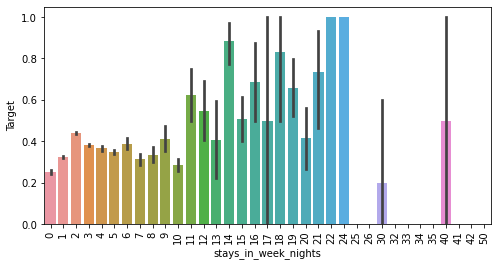

Mean 
 stays_in_week_nights
0     0.250229
1     0.324348
2     0.441575
3     0.382110
4     0.365471
5     0.348560
6     0.388259
7     0.313897
8     0.335366
9     0.411255
10    0.284749
11    0.625000
12    0.547619
13    0.407407
14    0.885714
15    0.505882
16    0.687500
17    0.500000
18    0.833333
19    0.659091
20    0.414634
21    0.733333
22    1.000000
24    1.000000
25    0.000000
26    0.000000
30    0.200000
32    0.000000
33    0.000000
34    0.000000
35    0.000000
40    0.500000
41    0.000000
42    0.000000
50    0.000000
Name: Target, dtype: float64 
 

Count 
 stays_in_week_nights
0      7645
1     30310
2     33684
3     22258
4      9563
5     11077
6      1499
7      1029
8       656
9       231
10     1036
11       56
12       42
13       27
14       35
15       85
16       16
17        4
18        6
19       44
20       41
21       15
22        7
24        3
25        6
26        1
30        5
32        1
33        1
34        1
35        1
40        2
4

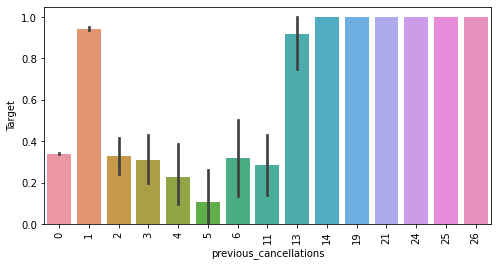

Mean 
 previous_cancellations
0     0.339061
1     0.944307
2     0.327586
3     0.307692
4     0.225806
5     0.105263
6     0.318182
11    0.285714
13    0.916667
14    1.000000
19    1.000000
21    1.000000
24    1.000000
25    1.000000
26    1.000000
Name: Target, dtype: float64 
 

Count 
 previous_cancellations
0     112906
1       6051
2        116
3         65
4         31
5         19
6         22
11        35
13        12
14        14
19        19
21         1
24        48
25        25
26        26
Name: Target, dtype: int64


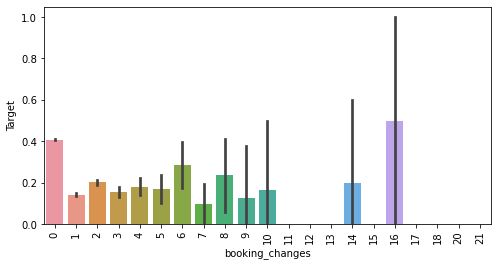

Mean 
 booking_changes
0     0.408542
1     0.142272
2     0.201314
3     0.155340
4     0.178191
5     0.169492
6     0.285714
7     0.096774
8     0.235294
9     0.125000
10    0.166667
11    0.000000
12    0.000000
13    0.000000
14    0.200000
15    0.000000
16    0.500000
17    0.000000
18    0.000000
20    0.000000
21    0.000000
Name: Target, dtype: float64 
 

Count 
 booking_changes
0     101314
1      12701
2       3805
3        927
4        376
5        118
6         63
7         31
8         17
9          8
10         6
11         2
12         2
13         5
14         5
15         3
16         2
17         2
18         1
20         1
21         1
Name: Target, dtype: int64


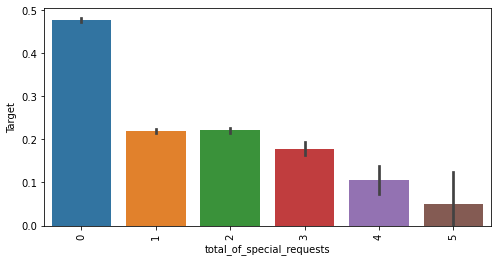

Mean 
 total_of_special_requests
0    0.477204
1    0.220249
2    0.220989
3    0.178614
4    0.105882
5    0.050000
Name: Target, dtype: float64 
 

Count 
 total_of_special_requests
0    70318
1    33226
2    12969
3     2497
4      340
5       40
Name: Target, dtype: int64


In [22]:
from numpy import mean
d4Hotel_cat = d4Hotel.dtypes == 'object'
d4Hotel_cat.drop(['country', 'reservation_status_date'], inplace = True)
d4Hotel_cat = d4Hotel_cat.index[d4Hotel_cat]
d4Hotel_cat = list(d4Hotel_cat)
d4Hotel_cat.append('country')
d4Hotel_cat.append('is_repeated_guest')
d4Hotel_cat.append('stays_in_weekend_nights')
d4Hotel_cat.append('stays_in_week_nights')
d4Hotel_cat.append('previous_cancellations')
d4Hotel_cat.append('booking_changes')
d4Hotel_cat.append('total_of_special_requests')
print(d4Hotel_cat)

for x in d4Hotel_cat:
    plt.figure(figsize = (8,4))
    sns.barplot(data=d4Hotel, x = x, y='Target', estimator=mean)
    plt.xticks(rotation = 90)
    plt.show()
    print('Mean', '\n', d4Hotel.groupby(x)['Target'].mean(), '\n', '\n')
    print('Count', '\n', d4Hotel.groupby(x)['Target'].count())
    

### Splitting the data

In [23]:
# Splitting to X and Y variables
hotel_Y = d4Hotel['Target']
print(hotel_Y.head())
print(hotel_Y.value_counts())
hotel_X = d4Hotel.drop('Target', axis=1)
print(hotel_X.shape)

0    0
1    0
2    0
3    0
4    0
Name: Target, dtype: int64
0    75166
1    44224
Name: Target, dtype: int64
(119390, 31)


In [24]:
hotel_X_num = hotel_X.select_dtypes(include = 'number')
hotel_X_char = hotel_X.select_dtypes(include = 'object')
print(hotel_X_num.shape)
print(hotel_X_char.shape)

d4Hotel_valueC2 = pd.DataFrame(hotel_X_num.nunique())
d4Hotel_valueC2.columns=['Feature_Level']
d4Hotel_valueC2

(119390, 18)
(119390, 13)


,Feature_Level
lead_time,479
arrival_date_year,3
arrival_date_week_number,53
arrival_date_day_of_month,31
stays_in_weekend_nights,17
stays_in_week_nights,35
adults,14
children,5
babies,5
is_repeated_guest,2


#### Slicing out numerical features which have less than 20 unique values and adding them to the categorical variables dataframe.

In [25]:
slice_less20 = d4Hotel_valueC2.loc[d4Hotel_valueC2['Feature_Level']<=20]
cat_list = slice_less20.index
cat = hotel_X_num.loc[:,cat_list]
cat.dtypes

arrival_date_year                int64
stays_in_weekend_nights          int64
adults                           int64
children                       float64
babies                           int64
is_repeated_guest                int64
previous_cancellations           int64
required_car_parking_spaces      int64
total_of_special_requests        int64
dtype: object

In [26]:
slice_more20 = d4Hotel_valueC2.loc[d4Hotel_valueC2['Feature_Level']>20]
num_list = slice_more20.index
hotel_X_num = hotel_X_num.loc[:,num_list]
hotel_X_num.shape

(119390, 9)

In [27]:
hotel_X_char = pd.concat([hotel_X_char, cat], axis=1, join = 'inner')
hotel_X_char.shape

(119390, 22)

#### Capping and flooring outliers

In [28]:
hotel_X_num.describe(percentiles=[0.01,0.02,0.05,0.10,0.25,0.50,0.75,0.90,0.98,0.99])

,lead_time,arrival_date_week_number,arrival_date_day_of_month,stays_in_week_nights,previous_bookings_not_canceled,booking_changes,agent,days_in_waiting_list,adr
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,104.011416,27.165173,15.798241,2.500302,0.137097,0.221124,74.828319,2.321149,101.831122
std,106.863097,13.605138,8.780829,1.908286,1.497437,0.652306,107.141953,17.594721,50.535790
min,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000
1%,0.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2%,0.000000,3.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,21.471400
5%,0.000000,5.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,38.400000
10%,3.000000,8.000000,4.000000,1.000000,0.000000,0.000000,0.000000,0.000000,50.000000
25%,18.000000,16.000000,8.000000,1.000000,0.000000,0.000000,7.000000,0.000000,69.290000
50%,69.000000,28.000000,16.000000,2.000000,0.000000,0.000000,9.000000,0.000000,94.575000


In [29]:
def outlier_cap(x):
    x = x.clip(lower = x.quantile(0.01))
    x = x.clip(upper = x.quantile(0.99))
    return x

hotel_X_num = hotel_X_num.apply(lambda x : outlier_cap(x))

hotel_X_num.describe(percentiles = [0.01,0.02,0.10,0.25,0.5,0.75,0.90,0.98,0.99])
    

,lead_time,arrival_date_week_number,arrival_date_day_of_month,stays_in_week_nights,previous_bookings_not_canceled,booking_changes,agent,days_in_waiting_list,adr
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,103.409180,27.173943,15.798241,2.479211,0.060273,0.209574,74.122992,1.606902,101.461251
std,104.600923,13.588582,8.780829,1.761267,0.376351,0.555245,104.791575,9.760268,46.905036
min,0.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1%,0.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2%,0.000000,3.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,21.471400
10%,3.000000,8.000000,4.000000,1.000000,0.000000,0.000000,0.000000,0.000000,50.000000
25%,18.000000,16.000000,8.000000,1.000000,0.000000,0.000000,7.000000,0.000000,69.290000
50%,69.000000,28.000000,16.000000,2.000000,0.000000,0.000000,9.000000,0.000000,94.575000
75%,160.000000,38.000000,23.000000,3.000000,0.000000,0.000000,152.000000,0.000000,126.000000


In [30]:
hotel_X_num.isnull().sum()

lead_time                         0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_week_nights              0
previous_bookings_not_canceled    0
booking_changes                   0
agent                             0
days_in_waiting_list              0
adr                               0
dtype: int64

In [31]:
hotel_X_char.isnull().sum()

hotel                          0
arrival_month_year             0
arrival_date_month             0
meal                           0
country                        0
market_segment                 0
distribution_channel           0
reserved_room_type             0
assigned_room_type             0
deposit_type                   0
customer_type                  0
reservation_status             0
reservation_status_date        0
arrival_date_year              0
stays_in_weekend_nights        0
adults                         0
children                       0
babies                         0
is_repeated_guest              0
previous_cancellations         0
required_car_parking_spaces    0
total_of_special_requests      0
dtype: int64

### Feature Selection

#### Numerical features

##### Features with Zero Variance

In [32]:
var_select_num = VarianceThreshold(threshold = 0)
var_select_num.fit_transform(hotel_X_num)
cols = var_select_num.get_support(indices = True)
num2 = hotel_X_num.iloc[:, cols]
num2.shape

(119390, 9)

In [33]:
num2.iloc[0]

lead_time                         342.0
arrival_date_week_number           27.0
arrival_date_day_of_month           1.0
stays_in_week_nights                0.0
previous_bookings_not_canceled      0.0
booking_changes                     3.0
agent                               0.0
days_in_waiting_list                0.0
adr                                 0.0
Name: 0, dtype: float64

#### BiVariate Analysis - Feature Discretization - Numerical

In [34]:
discrete = KBinsDiscretizer(n_bins = 10, encode = 'ordinal', strategy = 'quantile')
hotel_X_num_binned = pd.DataFrame(discrete.fit_transform(num2), index = num2.index, columns = num2.columns).add_suffix('_Rank')
hotel_X_num_binned.head()

,lead_time_Rank,arrival_date_week_number_Rank,arrival_date_day_of_month_Rank,stays_in_week_nights_Rank,previous_bookings_not_canceled_Rank,booking_changes_Rank,agent_Rank,days_in_waiting_list_Rank,adr_Rank
0,9.0,4.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,9.0,4.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,1.0,4.0,0.0,1.0,0.0,0.0,0.0,0.0,3.0
3,2.0,4.0,0.0,1.0,0.0,0.0,5.0,0.0,3.0
4,2.0,4.0,0.0,2.0,0.0,0.0,5.0,0.0,5.0


In [35]:
hotel_X_num_binned.tail()

,lead_time_Rank,arrival_date_week_number_Rank,arrival_date_day_of_month_Rank,stays_in_week_nights_Rank,previous_bookings_not_canceled_Rank,booking_changes_Rank,agent_Rank,days_in_waiting_list_Rank,adr_Rank
119385,2.0,6.0,9.0,5.0,0.0,0.0,5.0,0.0,5.0
119386,6.0,6.0,9.0,5.0,0.0,0.0,2.0,0.0,9.0
119387,3.0,6.0,9.0,5.0,0.0,0.0,2.0,0.0,8.0
119388,6.0,6.0,9.0,5.0,0.0,0.0,4.0,0.0,5.0
119389,8.0,6.0,9.0,5.0,0.0,0.0,2.0,0.0,8.0


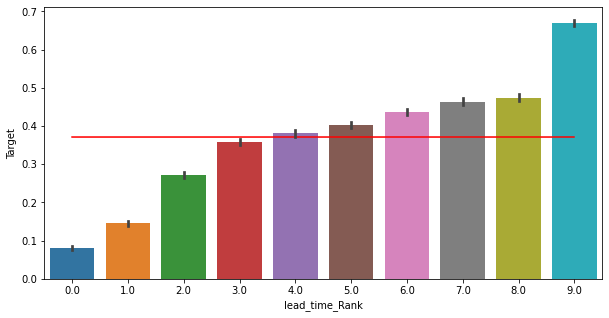

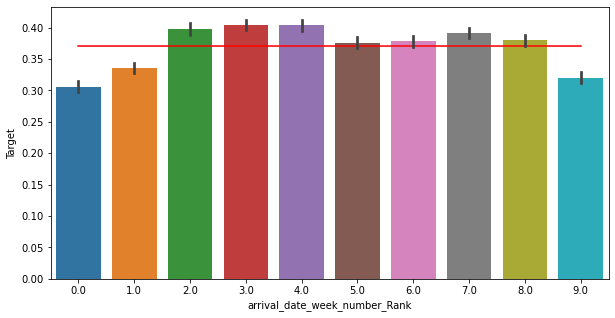

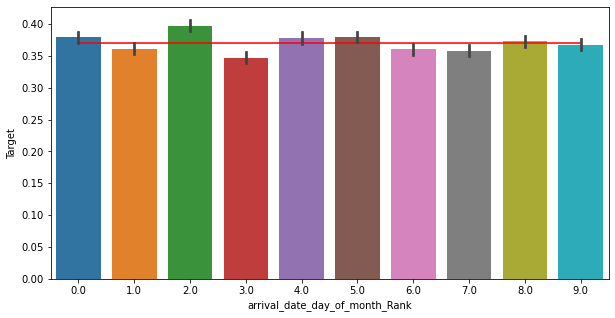

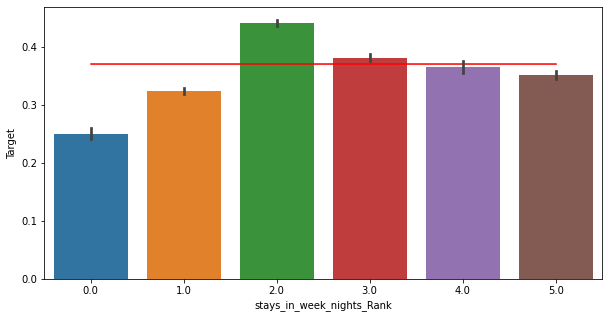

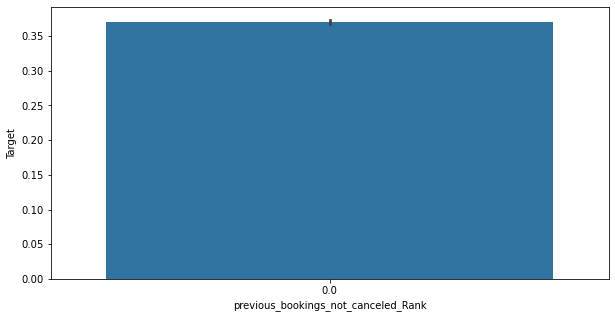

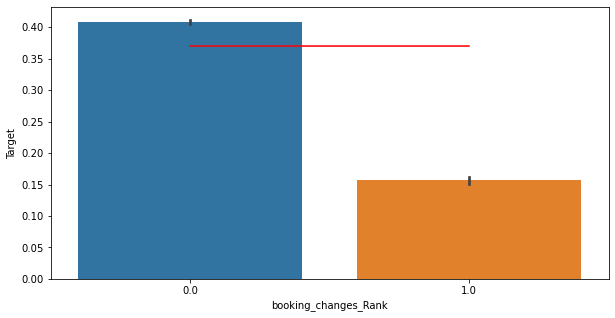

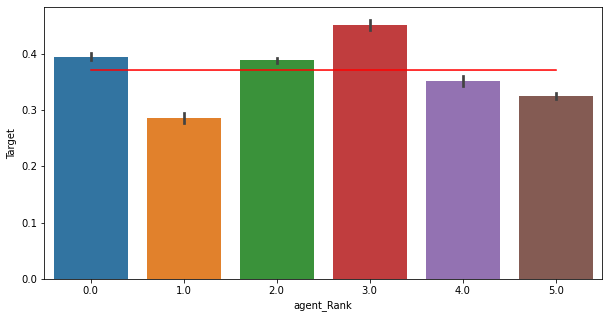

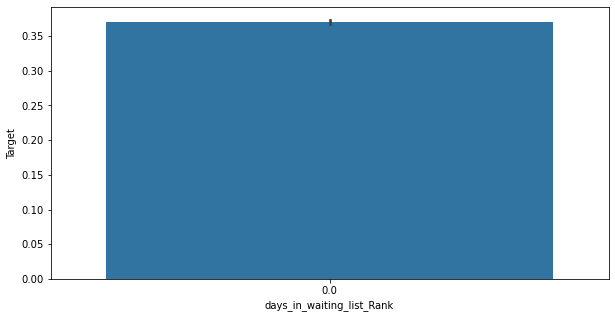

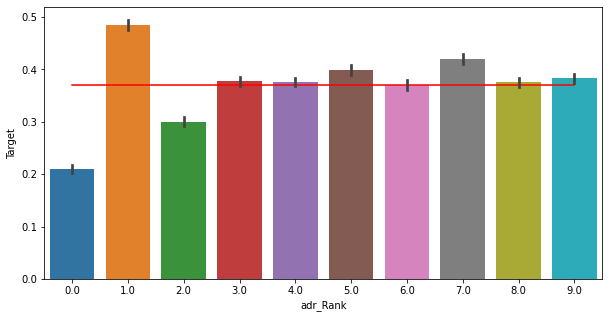

In [36]:
# Check if the ranked variables show a clear trend. A clear trend will show the ability of the variable to be a good
# predictor, i.e. to help discriminate an event from non-event. 

x_bin_combined = pd.concat([hotel_X_num_binned, hotel_Y], axis = 1, join = 'inner')

for col in hotel_X_num_binned.columns:
    plt.figure(figsize = (10,5))
    sns.lineplot(data = x_bin_combined, x = col, y = x_bin_combined['Target'].mean(), color = 'red')
    sns.barplot(data = x_bin_combined, x = col, y = 'Target', estimator = mean)
    plt.show()

In [37]:
# Change relevant features to indicator variables.

num2['days_in_waiting_list_ind'] = np.where(num2['days_in_waiting_list']>0, 1, 0)
num2['booking_changes_ind'] = np.where(num2['booking_changes']>0, 1, 0)
num2['previous_bookings_not_canceled_ind'] = np.where(num2['previous_bookings_not_canceled'] > 0, 1, 0)
num2.head()

,lead_time,arrival_date_week_number,arrival_date_day_of_month,stays_in_week_nights,previous_bookings_not_canceled,booking_changes,agent,days_in_waiting_list,adr,days_in_waiting_list_ind,booking_changes_ind,previous_bookings_not_canceled_ind
0,342,27,1,0,0,3,0.0,0,0.0,0,1,0
1,444,27,1,0,0,3,0.0,0,0.0,0,1,0
2,7,27,1,1,0,0,0.0,0,75.0,0,0,0
3,13,27,1,1,0,0,304.0,0,75.0,0,0,0
4,14,27,1,2,0,0,240.0,0,98.0,0,0,0


In [38]:
# Drop irrelevant features

num2 = num2.drop(['arrival_date_day_of_month', 'arrival_date_week_number', 'days_in_waiting_list',
                  'previous_bookings_not_canceled', 'booking_changes'], axis=1)

In [39]:
num2.head()

,lead_time,stays_in_week_nights,agent,adr,days_in_waiting_list_ind,booking_changes_ind,previous_bookings_not_canceled_ind
0,342,0,0.0,0.0,0,1,0
1,444,0,0.0,0.0,0,1,0
2,7,1,0.0,75.0,0,0,0
3,13,1,304.0,75.0,0,0,0
4,14,2,240.0,98.0,0,0,0


In [40]:
num2.shape

(119390, 7)

#### Select K Best - Numerical

In [41]:
selector = SelectKBest(chi2, k=5)
selector.fit_transform(num2, hotel_Y)
cols = selector.get_support(indices=True)
selected_num_features = num2.iloc[:,cols]
selected_num_features.iloc[0]

lead_time                             342.0
agent                                   0.0
adr                                     0.0
booking_changes_ind                     1.0
previous_bookings_not_canceled_ind      0.0
Name: 0, dtype: float64

### Categorical Features

#### BiVariate Analysis - Categorical

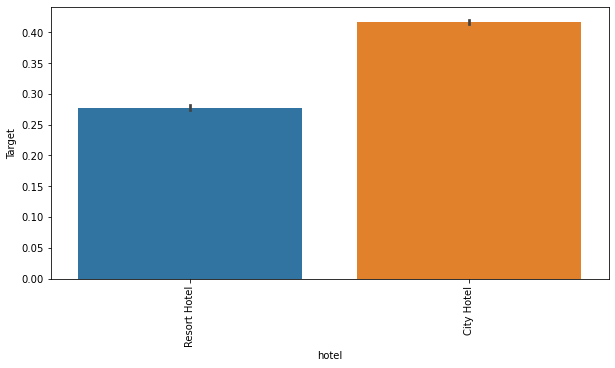

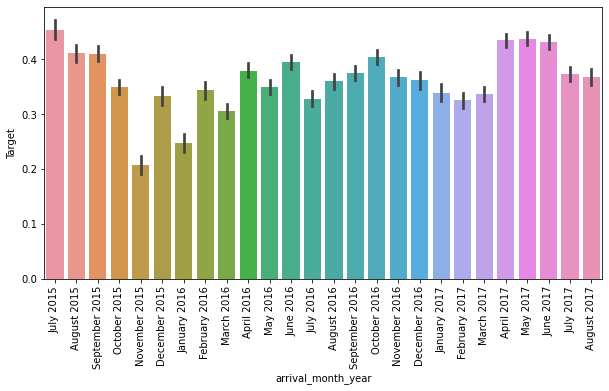

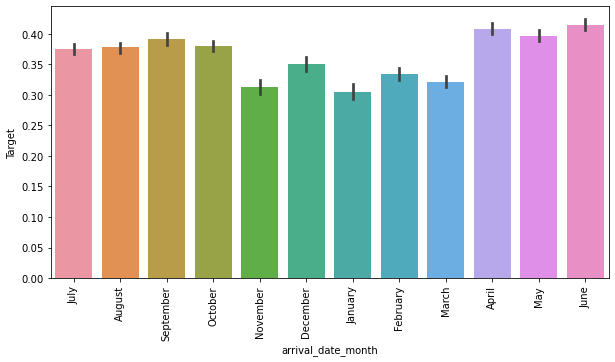

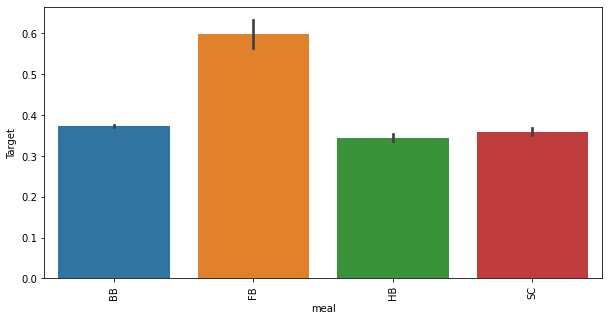

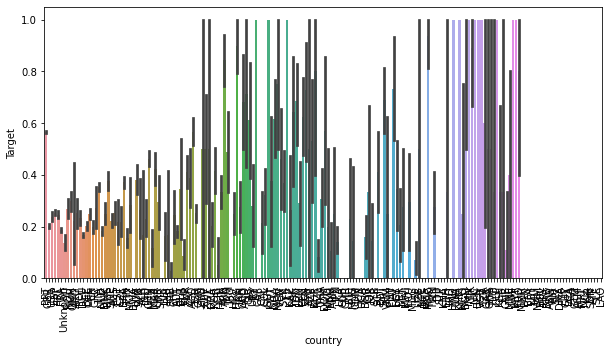

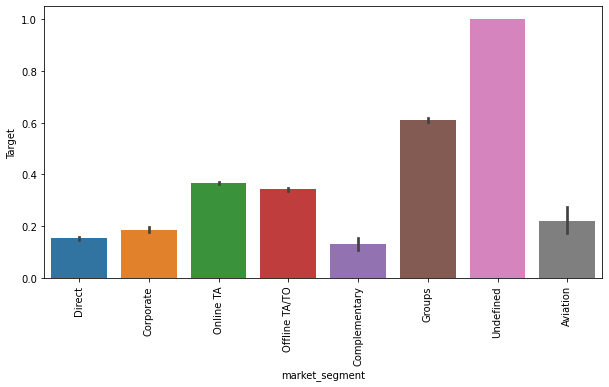

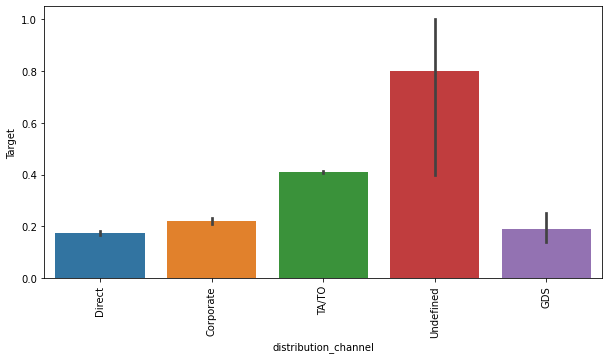

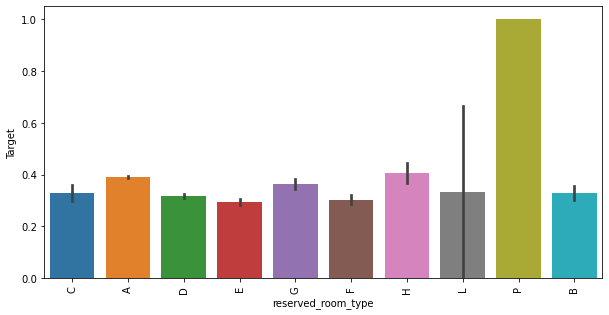

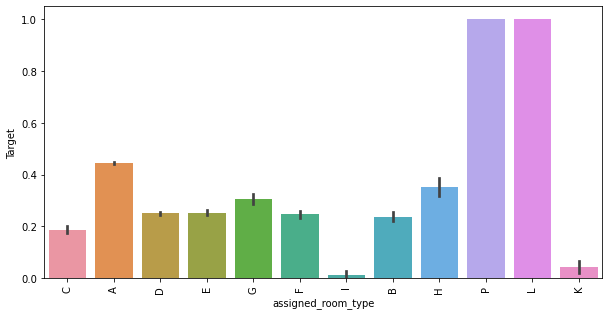

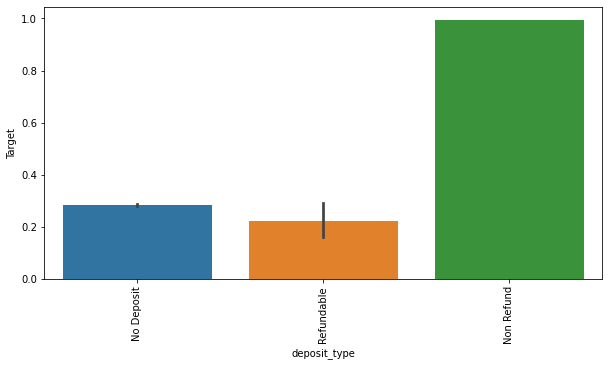

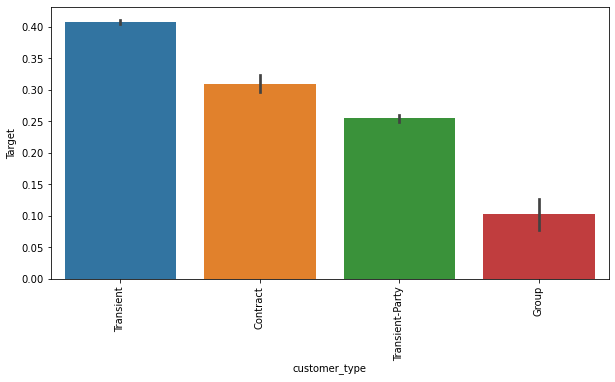

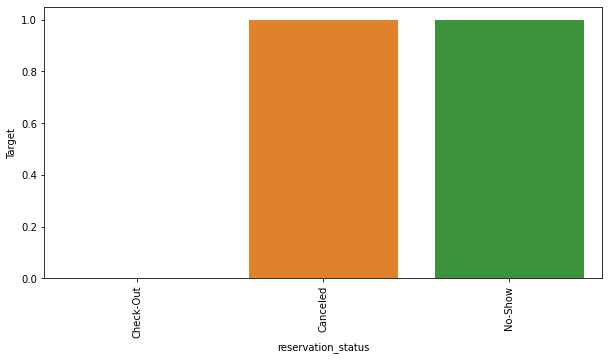

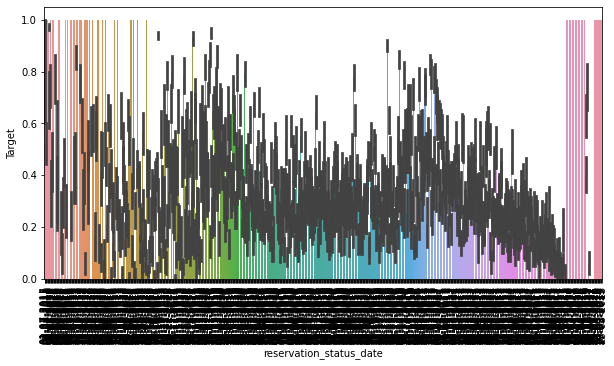

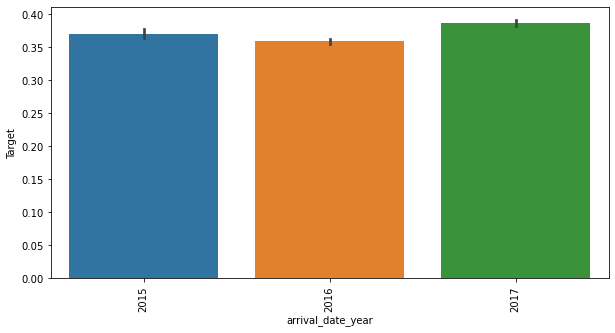

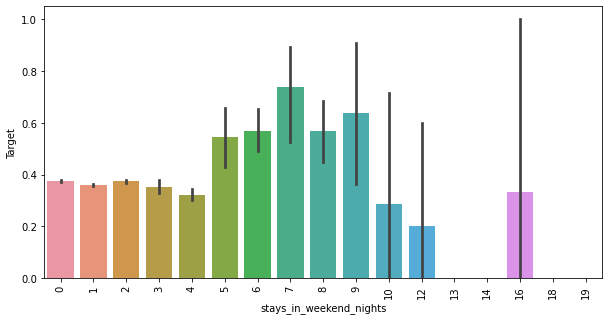

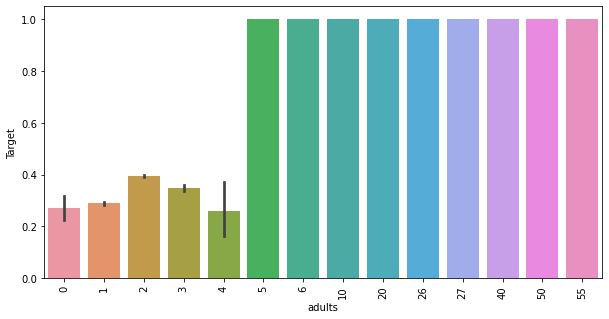

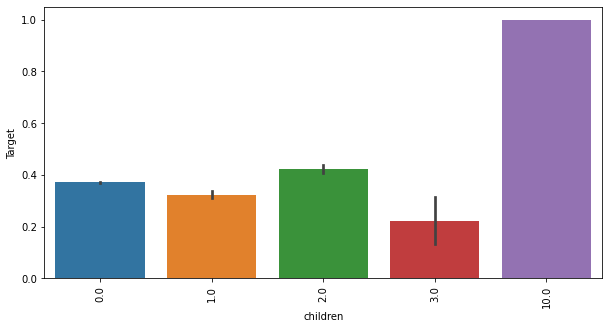

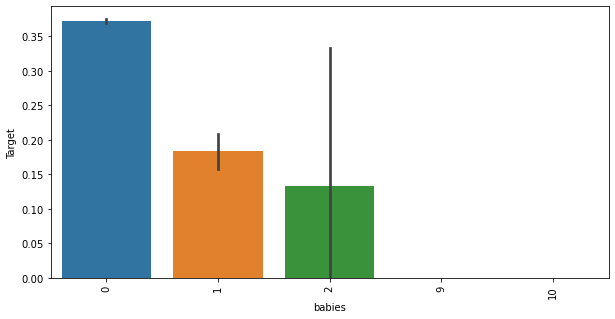

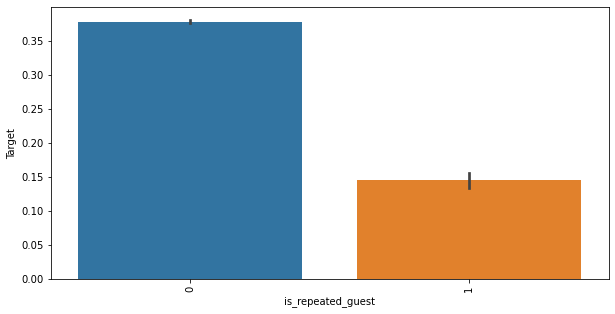

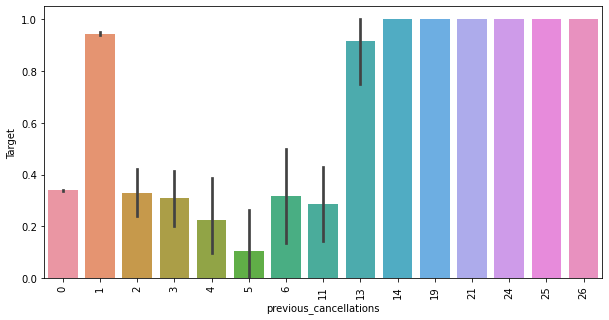

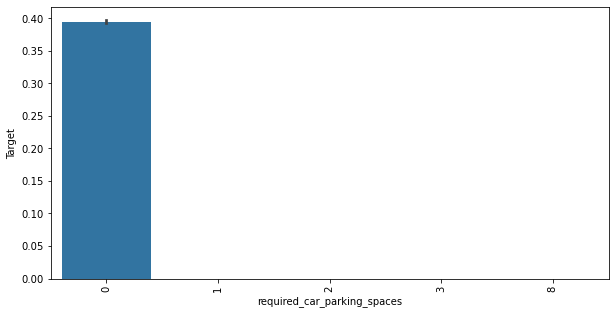

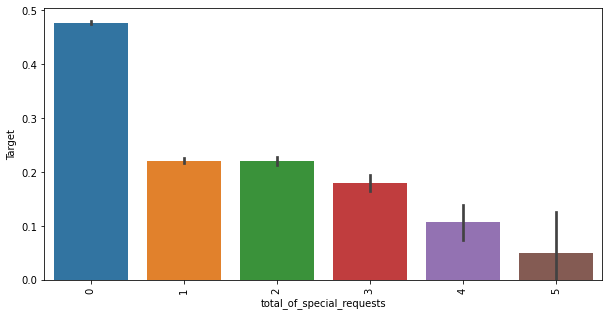

In [42]:
x_char_combined = pd.concat([hotel_X_char, hotel_Y], axis = 1, join = 'inner')

for col in hotel_X_char.columns:
    plt.figure(figsize = (10,5))
    sns.barplot(data = x_char_combined, x = col, y = 'Target', estimator = mean)
    plt.xticks(rotation = 90)
    plt.show()
    

In [43]:
char_1 = hotel_X_char.drop(['arrival_date_month', 'country', 'reservation_status_date', 
                   'arrival_date_year', 'reservation_status'], axis=1)
char_1.shape

(119390, 17)

In [44]:
char_1.dtypes

hotel                           object
arrival_month_year              object
meal                            object
market_segment                  object
distribution_channel            object
reserved_room_type              object
assigned_room_type              object
deposit_type                    object
customer_type                   object
stays_in_weekend_nights          int64
adults                           int64
children                       float64
babies                           int64
is_repeated_guest                int64
previous_cancellations           int64
required_car_parking_spaces      int64
total_of_special_requests        int64
dtype: object

In [45]:
hotel_X_char_dum = pd.get_dummies(char_1, drop_first = True)
hotel_X_char_dum.shape

(119390, 73)

In [46]:
hotel_X_char_dum.head()

,stays_in_weekend_nights,adults,children,babies,is_repeated_guest,previous_cancellations,required_car_parking_spaces,total_of_special_requests,hotel_Resort Hotel,arrival_month_year_April 2017,arrival_month_year_August 2015,arrival_month_year_August 2016,arrival_month_year_August 2017,arrival_month_year_December 2015,arrival_month_year_December 2016,arrival_month_year_February 2016,arrival_month_year_February 2017,arrival_month_year_January 2016,arrival_month_year_January 2017,arrival_month_year_July 2015,arrival_month_year_July 2016,arrival_month_year_July 2017,arrival_month_year_June 2016,arrival_month_year_June 2017,arrival_month_year_March 2016,arrival_month_year_March 2017,arrival_month_year_May 2016,arrival_month_year_May 2017,arrival_month_year_November 2015,arrival_month_year_November 2016,arrival_month_year_October 2015,arrival_month_year_October 2016,arrival_month_year_September 2015,arrival_month_year_September 2016,meal_FB,meal_HB,meal_SC,market_segment_Complementary,market_segment_Corporate,market_segment_Direct,market_segment_Groups,market_segment_Offline TA/TO,market_segment_Online TA,market_segment_Undefined,distribution_channel_Direct,distribution_channel_GDS,distribution_channel_TA/TO,distribution_channel_Undefined,reserved_room_type_B,reserved_room_type_C,reserved_room_type_D,reserved_room_type_E,reserved_room_type_F,reserved_room_type_G,reserved_room_type_H,reserved_room_type_L,reserved_room_type_P,assigned_room_type_B,assigned_room_type_C,assigned_room_type_D,assigned_room_type_E,assigned_room_type_F,assigned_room_type_G,assigned_room_type_H,assigned_room_type_I,assigned_room_type_K,assigned_room_type_L,assigned_room_type_P,deposit_type_Non Refund,deposit_type_Refundable,customer_type_Group,customer_type_Transient,customer_type_Transient-Party
0,0,2,0.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,0,2,0.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,0,1,0.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,0,1,0.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,0,2,0.0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


#### Select K Best - Categorical

In [47]:
selector_char = SelectKBest(chi2, k=60)
selector_char.fit_transform(hotel_X_char_dum, hotel_Y)

cols = selector_char.get_support(indices=True)
selected_cat_features = hotel_X_char_dum.iloc[:, cols]

In [48]:
selected_cat_features.iloc[0]

adults                               2.0
children                             0.0
babies                               0.0
is_repeated_guest                    0.0
previous_cancellations               0.0
required_car_parking_spaces          0.0
total_of_special_requests            0.0
hotel_Resort Hotel                   1.0
arrival_month_year_April 2017        0.0
arrival_month_year_August 2015       0.0
arrival_month_year_December 2015     0.0
arrival_month_year_February 2016     0.0
arrival_month_year_February 2017     0.0
arrival_month_year_January 2016      0.0
arrival_month_year_January 2017      0.0
arrival_month_year_July 2015         1.0
arrival_month_year_July 2016         0.0
arrival_month_year_June 2016         0.0
arrival_month_year_June 2017         0.0
arrival_month_year_March 2016        0.0
arrival_month_year_March 2017        0.0
arrival_month_year_May 2016          0.0
arrival_month_year_May 2017          0.0
arrival_month_year_November 2015     0.0
arrival_month_ye

#### Creating the master feature set

In [49]:
X_all = pd.concat([selected_num_features, selected_cat_features], axis=1, join = 'inner')

In [50]:
X_all.shape

(119390, 65)

### Building the models

In [51]:
X_Train, X_Test, Y_Train, Y_Test = train_test_split(X_all, hotel_Y, test_size = 0.3, random_state = 20)
print(f'Shape of training data is : {X_Train.shape}.')
print(f'Shape of testing data is : {X_Test.shape}.')
print(f'Event rate in training data is : {Y_Train.mean()}.')
print(f'Event rate in testing data is : {Y_Test.mean()}.')

Shape of training data is : (83573, 65).
Shape of testing data is : (35817, 65).
Event rate in training data is : 0.3704426070620894.
Event rate in testing data is : 0.37035485942429575.


#### Logistic Regression model

In [52]:
hotel_lr = LogisticRegression(random_state = 20, max_iter = 200)
hotel_lr.fit(X_Train, Y_Train)

LogisticRegression(max_iter=200, random_state=20)

In [53]:
coeff_lrm = pd.DataFrame(X_all.columns)
coeff_lrm.columns = ['Features']
coeff_lrm['Coefficient Estimates'] = hotel_lr.coef_[0]
print(coeff_lrm)
print('Feature with the least weight/coefficient estimate is : ')
print(coeff_lrm[coeff_lrm['Coefficient Estimates'] == abs(coeff_lrm['Coefficient Estimates']).min()])
print('Feature with the max weight/coefficient estimate is : ')
print(coeff_lrm[coeff_lrm['Coefficient Estimates'] == abs(coeff_lrm['Coefficient Estimates'].max())])

                              Features  Coefficient Estimates
0                            lead_time               0.004075
1                                agent               0.000837
2                                  adr               0.004600
3                  booking_changes_ind              -0.741571
4   previous_bookings_not_canceled_ind              -1.491781
..                                 ...                    ...
60             deposit_type_Non Refund               5.399491
61             deposit_type_Refundable               0.001807
62                 customer_type_Group              -0.203591
63             customer_type_Transient               0.208833
64       customer_type_Transient-Party              -0.352072

[65 rows x 2 columns]
Feature with the least weight/coefficient estimate is : 
  Features  Coefficient Estimates
1    agent               0.000837
Feature with the max weight/coefficient estimate is : 
                   Features  Coefficient Estimates
60

In [54]:
Y_Pred_lrm = hotel_lr.predict(X_Test)
lrm_fit_model_accuracy = hotel_lr.score(X_Train, Y_Train)
lrm_fit_model_accuracy_test = hotel_lr.score(X_Test, Y_Test)
lrm_accuracy = metrics.accuracy_score(Y_Test, Y_Pred_lrm)
lrm_recall = metrics.recall_score(Y_Test, Y_Pred_lrm)
lrm_precision = metrics.precision_score(Y_Test, Y_Pred_lrm)
lrm_f1 = metrics.f1_score(Y_Test, Y_Pred_lrm)

print('Model Accuracy is ', lrm_fit_model_accuracy)
print('Model Test data Accuracy is ', lrm_fit_model_accuracy_test)
print('Metrics Test Accuracy is : ', lrm_accuracy)
print('Recall is : ', lrm_recall)
print('Precision is : ', lrm_precision)
print('f1 Score is : ', lrm_f1)

Model Accuracy is  0.8051045194021993
Model Test data Accuracy is  0.8044504006477371
Metrics Test Accuracy is :  0.8044504006477371
Recall is :  0.61688654353562
Precision is :  0.8097971301335972
f1 Score is :  0.7002995293110825


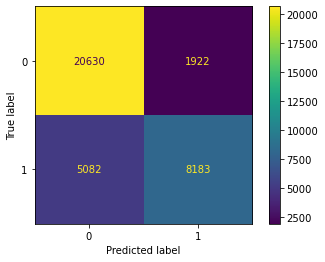

In [55]:
lrm_conf_mat = metrics.plot_confusion_matrix(hotel_lr, X_Test, Y_Test)

#### Decision Tree Model

In [56]:
hotel_dt_trial = DecisionTreeClassifier(random_state = 20, criterion = 'gini')
dt_param = {'max_depth': [3,4,5,6,7,8,9,10,15,20,25,50], 'min_samples_split': [25,50,100,150,200,250], 'criterion' : ['gini', 'entropy']}
dt_model_grid = GridSearchCV(hotel_dt_trial, cv = 10, param_grid = dt_param, n_jobs = -1)
dt_model_grid.fit(X_Train, Y_Train)
print('Best parameters using grid search are \n', dt_model_grid.best_params_)

Best parameters using grid search are 
 {'criterion': 'entropy', 'max_depth': 50, 'min_samples_split': 100}


In [57]:
hotel_dt_final = DecisionTreeClassifier(**dt_model_grid.best_params_)
hotel_dt_final.fit(X_Train, Y_Train)
Y_Pred_dt = hotel_dt_final.predict(X_Test)
dt_accuracy = metrics.accuracy_score(Y_Test, Y_Pred_dt)
dt_precision = metrics.precision_score(Y_Test, Y_Pred_dt)
dt_recall = metrics.recall_score(Y_Test, Y_Pred_dt)
dt_f1 = metrics.f1_score(Y_Test, Y_Pred_dt)
print(f'Model accuracy is : {hotel_dt_final.score(X_Train, Y_Train)}.')
print(f'Model Test accuracy is : {hotel_dt_final.score(X_Test, Y_Test)}.')
print(f'Test accuracy score is : {dt_accuracy}.')
print(f'Test precision score is : {dt_precision}.')
print(f'Test recall score is : {dt_recall}.')
print(f'Test f1 score is : {dt_f1}.')

Model accuracy is : 0.8633769279552008.
Model Test accuracy is : 0.8356087891224837.
Test accuracy score is : 0.8356087891224837.
Test precision score is : 0.8104536655163707.
Test recall score is : 0.7258952129664531.
Test f1 score is : 0.7658474508868209.


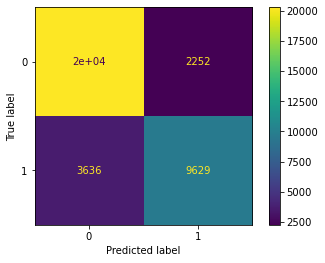

In [58]:
dt_conf_mat = metrics.plot_confusion_matrix(hotel_dt_final, X_Test, Y_Test)

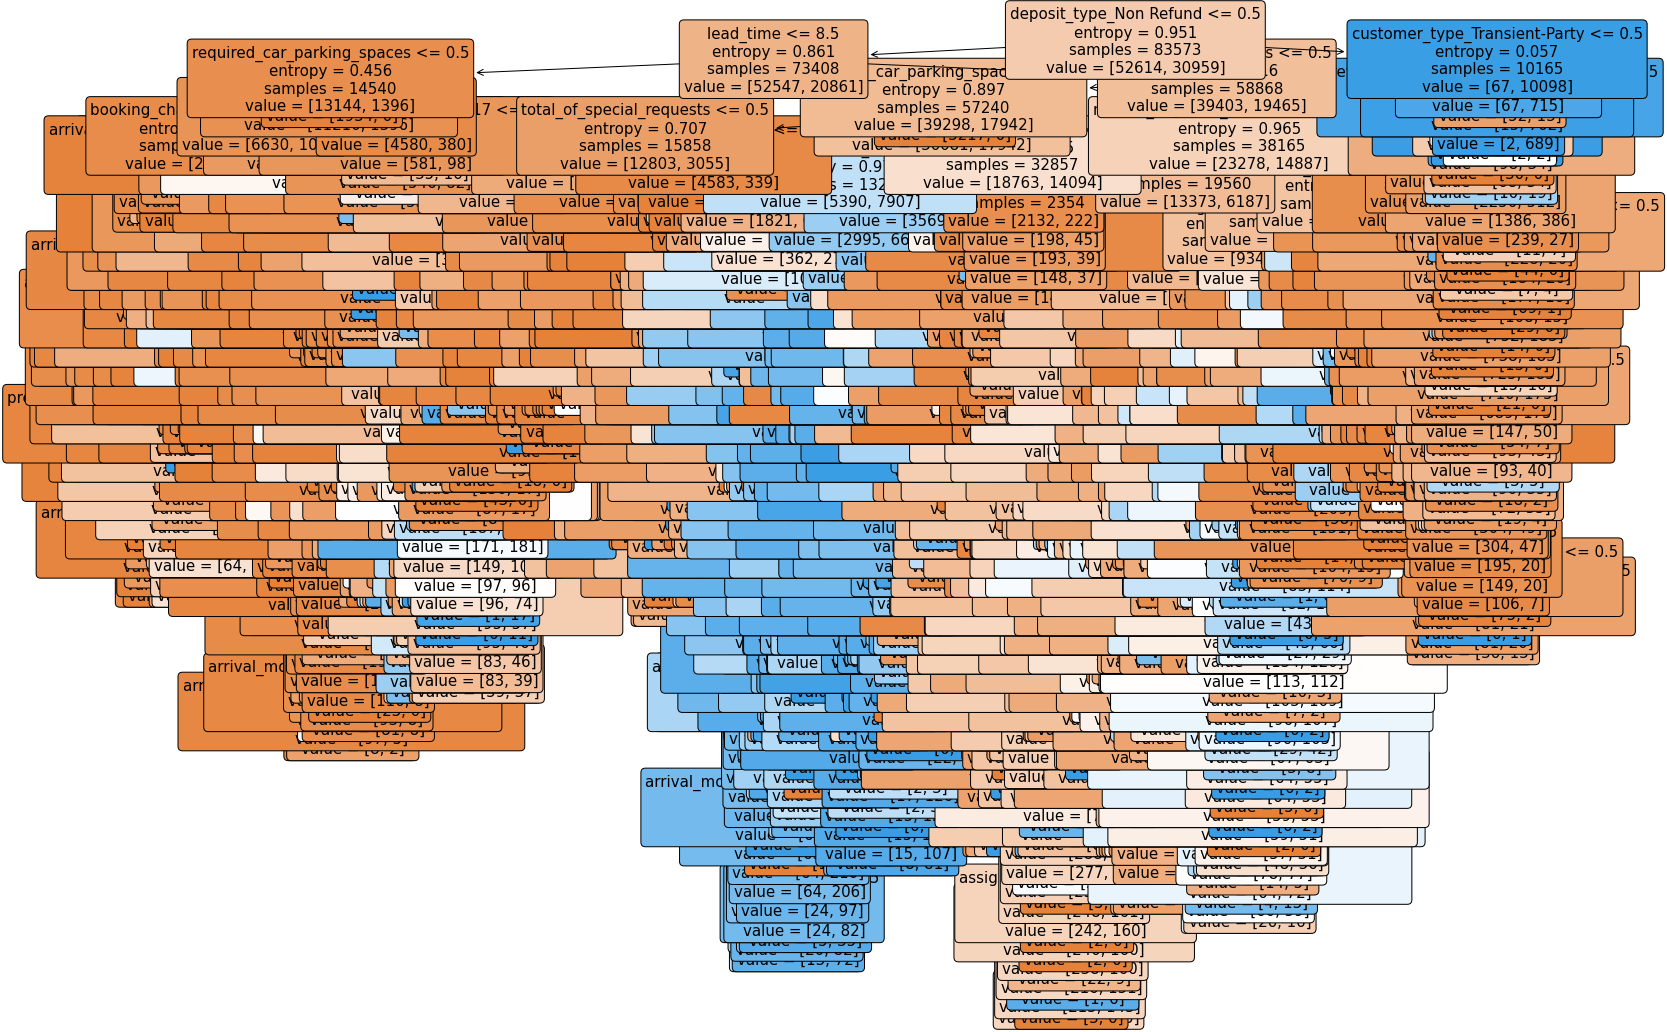

In [59]:
plt.figure(figsize = (24, 18))
tree.plot_tree(hotel_dt_final, filled = True, fontsize = 15, rounded=True, feature_names = X_all.columns)
plt.show()

#### Random Forest Model

In [60]:
hotel_rf = RandomForestClassifier(random_state = 20, criterion = 'entropy', max_depth = 50, min_samples_split = 100)
hotel_rf.fit(X_Train, Y_Train)

RandomForestClassifier(criterion='entropy', max_depth=50, min_samples_split=100,
                       random_state=20)

In [61]:
rf_feature_importances = pd.DataFrame(hotel_rf.feature_importances_, index = X_Train.columns, columns = ['Importances']).sort_values('Importances', ascending = False)
print(rf_feature_importances)

                                Importances
deposit_type_Non Refund            0.221098
lead_time                          0.126650
total_of_special_requests          0.082275
previous_cancellations             0.070463
agent                              0.065069
...                                     ...
market_segment_Complementary       0.000306
assigned_room_type_P               0.000212
reserved_room_type_P               0.000191
distribution_channel_GDS           0.000180
distribution_channel_Undefined     0.000078

[65 rows x 1 columns]


In [62]:
Y_Pred_rf = hotel_rf.predict(X_Test)
rf_model_train_accuracy = hotel_rf.score(X_Train, Y_Train)
rf_model_test_accuracy = hotel_rf.score(X_Test, Y_Test)
rf_accuracy = metrics.accuracy_score(Y_Test, Y_Pred_rf)
rf_precision = metrics.precision_score(Y_Test, Y_Pred_rf)
rf_recall = metrics.recall_score(Y_Test, Y_Pred_rf)
rf_f1 = metrics.f1_score(Y_Test, Y_Pred_rf)
print(f'Model Train accuracy is : {rf_model_train_accuracy}.')
print(f'Model Test data accuracy is : {rf_model_test_accuracy}.')
print(f'Test accuracy is : {rf_accuracy}.')
print(f'Test precison is : {rf_precision}.')
print(f'Test recall is : {rf_recall}.')
print(f'Test f1 score is : {rf_f1}.')

Model Train accuracy is : 0.8596197336460341.
Model Test data accuracy is : 0.8479772175224055.
Test accuracy is : 0.8479772175224055.
Test precison is : 0.8672051089406462.
Test recall is : 0.6961176027139088.
Test f1 score is : 0.7722995859992472.


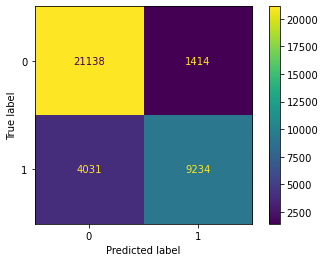

In [63]:
rf_conf_mat = metrics.plot_confusion_matrix(hotel_rf, X_Test, Y_Test)

#### Gradient Boosting Model

In [64]:
hotel_gbm = GradientBoostingClassifier(criterion = 'mse', min_samples_split = 100, max_depth = 50, random_state = 20)
hotel_gbm.fit(X_Train, Y_Train)

GradientBoostingClassifier(criterion='mse', max_depth=50, min_samples_split=100,
                           random_state=20)

In [65]:
gbm_feature_importances = pd.DataFrame(hotel_gbm.feature_importances_, index = X_Train.columns, columns=['Importances']).sort_values('Importances', ascending=False)
print(gbm_feature_importances)

                                Importances
deposit_type_Non Refund            0.266500
lead_time                          0.173990
adr                                0.137554
agent                              0.057054
total_of_special_requests          0.049278
...                                     ...
assigned_room_type_P               0.000253
distribution_channel_GDS           0.000250
customer_type_Group                0.000232
reserved_room_type_P               0.000183
distribution_channel_Undefined     0.000105

[65 rows x 1 columns]


In [66]:
Y_Pred_gbm = hotel_gbm.predict(X_Test)
gbm_model_train_accuracy = hotel_gbm.score(X_Train, Y_Train)
gbm_model_test_accuracy = hotel_gbm.score(X_Test, Y_Test)
gbm_accuracy = metrics.accuracy_score(Y_Test, Y_Pred_gbm)
gbm_precision = metrics.precision_score(Y_Test, Y_Pred_gbm)
gbm_recall = metrics.recall_score(Y_Test, Y_Pred_gbm)
gbm_f1 = metrics.f1_score(Y_Test, Y_Pred_gbm)
print(f'Model Train accuracy is : {gbm_model_train_accuracy}.')
print(f'Model Test data accuracy is : {gbm_model_test_accuracy}.')
print(f'Test accuracy is : {gbm_accuracy}.')
print(f'Test precison is : {gbm_precision}.')
print(f'Test recall is : {gbm_recall}.')
print(f'Test f1 score is : {gbm_f1}.')

Model Train accuracy is : 0.9834994555657928.
Model Test data accuracy is : 0.8649244772035626.
Test accuracy is : 0.8649244772035626.
Test precison is : 0.840209931368591.
Test recall is : 0.7844704108556352.
Test f1 score is : 0.8113840155945419.


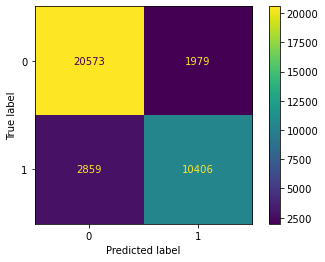

In [67]:
gbm_conf_mat = metrics.plot_confusion_matrix(hotel_gbm, X_Test, Y_Test, values_format = '.0f')

#### Stacking Classifier

In [68]:
stack_class_learner = [('hotel_rf', RandomForestClassifier(criterion = 'entropy', random_state = 20, max_depth = 50, min_samples_split = 100)),
                      ('hotel_gbm', GradientBoostingClassifier(criterion = 'mse', random_state = 20, max_depth = 50, min_samples_split = 100))]
hotel_sc = StackingClassifier(estimators = stack_class_learner, final_estimator = LogisticRegression())
hotel_sc.fit(X_Train, Y_Train)

StackingClassifier(estimators=[('hotel_rf',
                                RandomForestClassifier(criterion='entropy',
                                                       max_depth=50,
                                                       min_samples_split=100,
                                                       random_state=20)),
                               ('hotel_gbm',
                                GradientBoostingClassifier(criterion='mse',
                                                           max_depth=50,
                                                           min_samples_split=100,
                                                           random_state=20))],
                   final_estimator=LogisticRegression())

In [69]:
Y_Pred_sc = hotel_sc.predict(X_Test)
sc_accuracy = metrics.accuracy_score(Y_Test, Y_Pred_sc)
sc_recall = metrics.recall_score(Y_Test, Y_Pred_sc)
sc_precision = metrics.precision_score(Y_Test, Y_Pred_sc)
sc_f1 = metrics.f1_score(Y_Test, Y_Pred_sc)



print('Model Accuracy is : ', hotel_sc.score(X_Train, Y_Train))
print('Model Test Accuracy is : ', hotel_sc.score(X_Test, Y_Test))
print('Test Accuracy is : ', sc_accuracy)
print('Test Recall is : ', sc_recall)
print('Test Precision is : ', sc_precision)
print('Test f1 Score is : ', sc_f1)

Model Accuracy is :  0.9532863484618238
Model Test Accuracy is :  0.8683306809615545
Test Accuracy is :  0.8683306809615545
Test Recall is :  0.7816057293629853
Test Precision is :  0.8507425945679823
Test f1 Score is :  0.8147100424328146


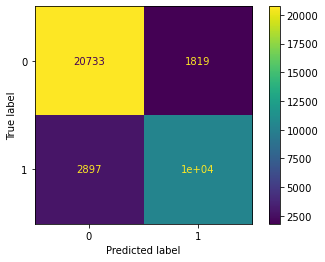

In [70]:
sc_conf_mat = metrics.plot_confusion_matrix(hotel_sc, X_Test, Y_Test)

### Models Evaluation

In [71]:
print('Test Accuracy of the five models is : ', f'Logistic Regression : {lrm_accuracy}.', f'Decision Tree : {dt_accuracy}.', f'Random Forest : {rf_accuracy}.', f'Gradient Boosting : {gbm_accuracy}.', f'Stacking Classifier : {sc_accuracy}.', sep='\n')

Test Accuracy of the five models is : 
Logistic Regression : 0.8044504006477371.
Decision Tree : 0.8356087891224837.
Random Forest : 0.8479772175224055.
Gradient Boosting : 0.8649244772035626.
Stacking Classifier : 0.8683306809615545.


In [72]:
print('Test Precision of the five models is : ', f'Logistic Regression : {lrm_precision}.', f'Decision Tree : {dt_precision}.', f'Random Forest : {rf_precision}.', f'Gradient Boosting : {gbm_precision}.', f'Stacking Classifier : {sc_precision}.', sep='\n')

Test Precision of the five models is : 
Logistic Regression : 0.8097971301335972.
Decision Tree : 0.8104536655163707.
Random Forest : 0.8672051089406462.
Gradient Boosting : 0.840209931368591.
Stacking Classifier : 0.8507425945679823.


In [73]:
print('Test Recall of the five models is : ', f'Logistic Regression : {lrm_recall}.', f'Decision Tree : {dt_recall}.', f'Random Forest : {rf_recall}.', f'Gradient Boosting : {gbm_recall}.', f'Stacking Classifier : {sc_recall}.', sep='\n')

Test Recall of the five models is : 
Logistic Regression : 0.61688654353562.
Decision Tree : 0.7258952129664531.
Random Forest : 0.6961176027139088.
Gradient Boosting : 0.7844704108556352.
Stacking Classifier : 0.7816057293629853.


In [74]:
print('Test f1 Score of the five models is : ', f'Logistic Regression : {lrm_f1}.', f'Decision Tree : {dt_f1}.', f'Random Forest : {rf_f1}.', f'Gradient Boosting : {gbm_f1}.', f'Stacking Classifier : {sc_f1}.', sep='\n')

Test f1 Score of the five models is : 
Logistic Regression : 0.7002995293110825.
Decision Tree : 0.7658474508868209.
Random Forest : 0.7722995859992472.
Gradient Boosting : 0.8113840155945419.
Stacking Classifier : 0.8147100424328146.


#### Observation

#### The Stacking Classifier slightly outperforms the Gradient Boosting Model. However, considering that feature importances are easier to identify in Gradient Boosting Model - decided to use Gradient Boosting Model

### Building the probability deciles

#### Gradient Boosting Model Deciles

In [75]:
y_pred_prob_gbm = hotel_gbm.predict_proba(X_all)[:,1]
d4Hotel['Pred Prob GBM'] = pd.DataFrame(y_pred_prob_gbm)
d4Hotel['P_Rank_GBM'] = pd.qcut(d4Hotel['Pred Prob GBM'].rank(method='first').values, 10, duplicates='drop').codes+1

rank_actuals_gbm = d4Hotel.groupby('P_Rank_GBM')['Target'].agg(['count', 'mean'])
rank_pred_gbm = d4Hotel.groupby('P_Rank_GBM')['Pred Prob GBM'].agg(['mean'])

rank_actuals_gbm.rename(columns = {'count': 'Count', 'mean': 'Actual Event Rate'},inplace = True)
rank_pred_gbm.rename(columns = {'mean': 'Pred Event Rate'}, inplace=True)

rank_gbm = pd.concat([rank_actuals_gbm, rank_pred_gbm], axis = 1, join = 'inner')

sorted_rank_gbm = rank_gbm.sort_values(by='P_Rank_GBM', ascending = False)

sorted_rank_gbm['No of Events'] = sorted_rank_gbm['Count']*sorted_rank_gbm['Actual Event Rate']
sorted_rank_gbm['Cum Events'] = sorted_rank_gbm['No of Events'].cumsum()
sorted_rank_gbm['Events Captured'] = sorted_rank_gbm['No of Events']/sum(sorted_rank_gbm['No of Events'])
sorted_rank_gbm['Cum Events Captured'] = sorted_rank_gbm['Events Captured'].cumsum()

sorted_rank_gbm['Non Events'] = sorted_rank_gbm['Count']-sorted_rank_gbm['No of Events']
sorted_rank_gbm['Cum Non Events'] = sorted_rank_gbm['Non Events'].cumsum()
sorted_rank_gbm['Non Event Captured'] = sorted_rank_gbm['Non Events']/sum(sorted_rank_gbm['Non Events'])
sorted_rank_gbm['Cum Non Event Captured'] = sorted_rank_gbm['Non Event Captured'].cumsum()

sorted_rank_gbm['Diff in Cap'] = round(sorted_rank_gbm['Cum Events Captured']- sorted_rank_gbm['Cum Non Event Captured'],4)
sorted_rank_gbm['Random Captured'] = sorted_rank_gbm['Count']/sum(sorted_rank_gbm['Count'])
sorted_rank_gbm['Cum Random Captured'] = sorted_rank_gbm['Random Captured'].cumsum()

gbm_prob_dec = sorted_rank_gbm.reset_index()
gbm_prob_dec['Decile'] = gbm_prob_dec.index+1
gbm_prob_dec['Lift Over Average'] = gbm_prob_dec['Actual Event Rate']/(gbm_prob_dec['No of Events'].sum()/(gbm_prob_dec['No of Events'].sum()+gbm_prob_dec['Non Events'].sum()))


gbm_prob_dec

,P_Rank_GBM,Count,Actual Event Rate,Pred Event Rate,No of Events,Cum Events,Events Captured,Cum Events Captured,Non Events,Cum Non Events,Non Event Captured,Cum Non Event Captured,Diff in Cap,Random Captured,Cum Random Captured,Decile,Lift Over Average
0,10,11939,1.000000,0.999675,11939.0,11939.0,0.269967,0.269967,0.0,0.0,0.000000,0.000000,0.2700,0.1,0.1,1,2.699665
1,9,11939,0.990033,0.985805,11820.0,23759.0,0.267276,0.537242,119.0,119.0,0.001583,0.001583,0.5357,0.1,0.2,2,2.672757
2,8,11939,0.953346,0.890593,11382.0,35141.0,0.257372,0.794614,557.0,676.0,0.007410,0.008993,0.7856,0.1,0.3,3,2.573716
3,7,11939,0.579446,0.563610,6918.0,42059.0,0.156431,0.951045,5021.0,5697.0,0.066799,0.075792,0.8753,0.1,0.4,4,1.564309
4,6,11939,0.102856,0.157280,1228.0,43287.0,0.027768,0.978812,10711.0,16408.0,0.142498,0.218290,0.7605,0.1,0.5,5,0.277677
5,5,11939,0.037859,0.048984,452.0,43739.0,0.010221,0.989033,11487.0,27895.0,0.152822,0.371112,0.6179,0.1,0.6,6,0.102207
6,4,11939,0.018678,0.018717,223.0,43962.0,0.005043,0.994076,11716.0,39611.0,0.155868,0.526980,0.4671,0.1,0.7,7,0.050425
7,3,11939,0.012731,0.007655,152.0,44114.0,0.003437,0.997513,11787.0,51398.0,0.156813,0.683793,0.3137,0.1,0.8,8,0.034370
8,2,11939,0.006449,0.002982,77.0,44191.0,0.001741,0.999254,11862.0,63260.0,0.157811,0.841604,0.1576,0.1,0.9,9,0.017411
9,1,11939,0.002764,0.000844,33.0,44224.0,0.000746,1.000000,11906.0,75166.0,0.158396,1.000000,0.0000,0.1,1.0,10,0.007462


#### Visualising the Model Probabilities Deciles

<AxesSubplot:title={'center':'Gains Chart (Non Event Captured)'}, xlabel='Decile', ylabel='Cum Events Captured'>

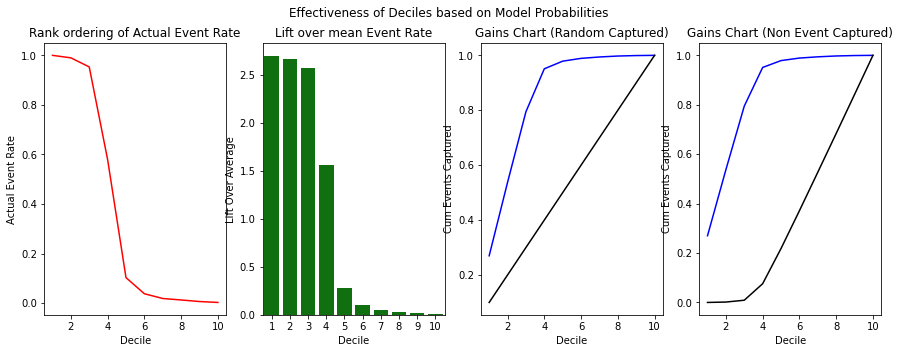

In [76]:
fig, axes = plt.subplots(1,4, figsize= (15,5))
fig.suptitle('Effectiveness of Deciles based on Model Probabilities')
axes[0].set_title('Rank ordering of Actual Event Rate')
axes[1].set_title('Lift over mean Event Rate')
axes[2].set_title('Gains Chart (Random Captured)')
axes[3].set_title('Gains Chart (Non Event Captured)')
sns.lineplot(ax = axes[0], data = gbm_prob_dec, x = 'Decile', y = 'Actual Event Rate', color = 'red')
sns.barplot(ax= axes[1], data = gbm_prob_dec, x = 'Decile', y = 'Lift Over Average', color = 'green')
sns.lineplot(ax = axes[2], data = gbm_prob_dec, x = 'Decile', y = 'Cum Events Captured', color = 'blue')
sns.lineplot(ax= axes[2], data = gbm_prob_dec, x = 'Decile', y = 'Cum Random Captured', color = 'black')
sns.lineplot(ax= axes[3], data = gbm_prob_dec, x = 'Decile', y = 'Cum Events Captured', color = 'blue')
sns.lineplot(ax = axes[3], data = gbm_prob_dec, x = 'Decile', y = 'Cum Non Event Captured', color = 'black')

In [77]:
d4Hotel

,hotel,Target,lead_time,arrival_month_year,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,Pred Prob GBM,P_Rank_GBM
0,Resort Hotel,0,342,July 2015,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,0.0,0,Transient,0.00,0,0,Check-Out,01-07-2015,0.008338,3
1,Resort Hotel,0,737,July 2015,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,0.0,0,Transient,0.00,0,0,Check-Out,01-07-2015,0.010200,3
2,Resort Hotel,0,7,July 2015,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,0.0,0,Transient,75.00,0,0,Check-Out,02-07-2015,0.003933,2
3,Resort Hotel,0,13,July 2015,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,0,Transient,75.00,0,0,Check-Out,02-07-2015,0.202558,6
4,Resort Hotel,0,14,July 2015,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,0,Transient,98.00,0,1,Check-Out,03-07-2015,0.042854,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,August 2017,2017,August,35,30,2,5,2,0.0,0,BB,BEL,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,394.0,0,Transient,96.14,0,0,Check-Out,06-09-2017,0.007434,3
119386,City Hotel,0,102,August 2017,2017,August,35,31,2,5,3,0.0,0,BB,FRA,Online TA,TA/TO,0,0,0,E,E,0,No Deposit,9.0,0,Transient,225.43,0,2,Check-Out,07-09-2017,0.227533,6
119387,City Hotel,0,34,August 2017,2017,August,35,31,2,5,2,0.0,0,BB,DEU,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,9.0,0,Transient,157.71,0,4,Check-Out,07-09-2017,0.085941,6
119388,City Hotel,0,109,August 2017,2017,August,35,31,2,5,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,89.0,0,Transient,104.40,0,0,Check-Out,07-09-2017,0.031256,5


### Drawing actionable insights from the model and strategy suggestions

#### Separating the high cancellation probability datapoints

In [78]:
d4Hotel['Predicted Cancel Rank'] = np.where(d4Hotel['P_Rank_GBM']<7, 'Bottom 6', 'Top 4')
d4Hotel['Predicted Cancel Rank'].value_counts()

Bottom 6    71634
Top 4       47756
Name: Predicted Cancel Rank, dtype: int64

In [79]:
d4Hotel_top4 = d4Hotel.loc[d4Hotel['Predicted Cancel Rank'] == 'Top 4']
d4Hotel_top4.shape

(47756, 35)

#### Comparing feature importances across all models and the combining them

In [80]:
logreg_feats = coeff_lrm
logreg_feats['Coeff Est Abs'] = abs(logreg_feats['Coefficient Estimates'])
logreg_feats_sorted = logreg_feats.sort_values(by = 'Coeff Est Abs', ascending = False)
logreg_feats_sorted.reset_index(inplace = True, drop = True)
logreg_feats_sorted['LR Feat Imp Pts'] = logreg_feats_sorted.index
logreg_feats_sorted.rename(columns = {'Features' : 'Feature'}, inplace = True)
logreg_feats_sorted['LR Feat Rank'] = logreg_feats_sorted.index+1

logreg_feats_sorted

,Feature,Coefficient Estimates,Coeff Est Abs,LR Feat Imp Pts,LR Feat Rank
0,deposit_type_Non Refund,5.399491,5.399491,0,1
1,required_car_parking_spaces,-3.702771,3.702771,1,2
2,previous_cancellations,2.140637,2.140637,2,3
3,previous_bookings_not_canceled_ind,-1.491781,1.491781,3,4
4,market_segment_Offline TA/TO,-1.308737,1.308737,4,5
...,...,...,...,...,...
60,reserved_room_type_H,-0.011622,0.011622,60,61
61,adr,0.004600,0.004600,61,62
62,lead_time,0.004075,0.004075,62,63
63,deposit_type_Refundable,0.001807,0.001807,63,64


In [81]:
dt_feat_imp = pd.DataFrame(hotel_dt_final.feature_importances_, index = X_Train.columns, columns=['Importance']).sort_values('Importance', ascending=False)
dt_feat_imp.reset_index(inplace=True)
dt_feat_imp['DT Feat Imp Pts'] = dt_feat_imp.index
dt_feat_imp.rename(columns = {'index': 'Feature', 'Importance':'DT Feat Imp'}, inplace = True)
dt_feat_imp['DT Feat Rank'] = dt_feat_imp.index+1
dt_feat_imp

,Feature,DT Feat Imp,DT Feat Imp Pts,DT Feat Rank
0,deposit_type_Non Refund,0.348607,0,1
1,lead_time,0.133031,1,2
2,adr,0.065184,2,3
3,agent,0.062442,3,4
4,total_of_special_requests,0.059586,4,5
...,...,...,...,...
60,market_segment_Complementary,0.000167,60,61
61,reserved_room_type_H,0.000166,61,62
62,reserved_room_type_P,0.000000,62,63
63,distribution_channel_GDS,0.000000,63,64


In [82]:
rf_feat_imp = rf_feature_importances.reset_index()
rf_feat_imp['RF Feat Imp Pts'] = rf_feat_imp.index
rf_feat_imp.rename(columns = {'index' : 'Feature', 'Importances': 'RF Feat Imp'}, inplace = True)
rf_feat_imp['RF Feat Rank'] = rf_feat_imp.index+1
rf_feat_imp

,Feature,RF Feat Imp,RF Feat Imp Pts,RF Feat Rank
0,deposit_type_Non Refund,0.221098,0,1
1,lead_time,0.126650,1,2
2,total_of_special_requests,0.082275,2,3
3,previous_cancellations,0.070463,3,4
4,agent,0.065069,4,5
...,...,...,...,...
60,market_segment_Complementary,0.000306,60,61
61,assigned_room_type_P,0.000212,61,62
62,reserved_room_type_P,0.000191,62,63
63,distribution_channel_GDS,0.000180,63,64


In [83]:
gbm_feat_imp = gbm_feature_importances.reset_index()
gbm_feat_imp['GBM Feat Imp Pts'] = gbm_feat_imp.index
gbm_feat_imp.rename(columns = {'index': 'Feature', 'Importances' : 'GBM Feat Imp'}, inplace=True)
gbm_feat_imp['GBM Feat Rank'] = gbm_feat_imp.index+1
gbm_feat_imp

,Feature,GBM Feat Imp,GBM Feat Imp Pts,GBM Feat Rank
0,deposit_type_Non Refund,0.266500,0,1
1,lead_time,0.173990,1,2
2,adr,0.137554,2,3
3,agent,0.057054,3,4
4,total_of_special_requests,0.049278,4,5
...,...,...,...,...
60,assigned_room_type_P,0.000253,60,61
61,distribution_channel_GDS,0.000250,61,62
62,customer_type_Group,0.000232,62,63
63,reserved_room_type_P,0.000183,63,64


In [84]:
feat_imp_all = pd.merge(logreg_feats_sorted, dt_feat_imp, on = 'Feature').merge(rf_feat_imp, on ='Feature').merge(gbm_feat_imp, on ='Feature')
feat_imp_all["Total Feat Points"] = feat_imp_all['LR Feat Imp Pts']+feat_imp_all['DT Feat Imp Pts']+feat_imp_all['RF Feat Imp Pts']+feat_imp_all['GBM Feat Imp Pts']
feat_imp_all
feat_imp_sorted = feat_imp_all.sort_values(by = 'Total Feat Points')
feat_imp_sorted.reset_index(inplace=True, drop = True)
feat_imp_sorted['Feature Rank'] = feat_imp_sorted.index+1
feat_imp_sorted

,Feature,Coefficient Estimates,Coeff Est Abs,LR Feat Imp Pts,LR Feat Rank,DT Feat Imp,DT Feat Imp Pts,DT Feat Rank,RF Feat Imp,RF Feat Imp Pts,RF Feat Rank,GBM Feat Imp,GBM Feat Imp Pts,GBM Feat Rank,Total Feat Points,Feature Rank
0,deposit_type_Non Refund,5.399491,5.399491,0,1,0.348607,0,1,0.221098,0,1,0.266500,0,1,0,1
1,previous_cancellations,2.140637,2.140637,2,3,0.045919,6,7,0.070463,3,4,0.038676,5,6,16,2
2,required_car_parking_spaces,-3.702771,3.702771,1,2,0.047252,5,6,0.053657,5,6,0.024768,7,8,18,3
3,total_of_special_requests,-0.808566,0.808566,8,9,0.059586,4,5,0.082275,2,3,0.049278,4,5,18,4
4,market_segment_Offline TA/TO,-1.308737,1.308737,4,5,0.028097,8,9,0.026394,9,10,0.025391,6,7,27,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60,reserved_room_type_H,-0.011622,0.011622,60,61,0.000166,61,62,0.000393,59,60,0.000617,55,56,235,61
61,market_segment_Complementary,-0.030281,0.030281,57,58,0.000167,60,61,0.000306,60,61,0.000423,58,59,235,62
62,deposit_type_Refundable,0.001807,0.001807,63,64,0.000218,58,59,0.000397,58,59,0.000416,59,60,238,63
63,reserved_room_type_P,0.045163,0.045163,53,54,0.000000,62,63,0.000191,62,63,0.000183,63,64,240,64


#### Table above shows the rank of the feature across all the four models feature importances. 
#### Column 'Total Feat Points' shows the points aggregated for all the models by a Feature.

### Note : Features are ranked in descending order - points are also in descending order. So, the lowest point total is the most important feature taking the average of all models. 


In [85]:
feat_imp_sorted.loc[feat_imp_sorted['Feature'] == 'deposit_type_Non Refund']

,Feature,Coefficient Estimates,Coeff Est Abs,LR Feat Imp Pts,LR Feat Rank,DT Feat Imp,DT Feat Imp Pts,DT Feat Rank,RF Feat Imp,RF Feat Imp Pts,RF Feat Rank,GBM Feat Imp,GBM Feat Imp Pts,GBM Feat Rank,Total Feat Points,Feature Rank
0,deposit_type_Non Refund,5.399491,5.399491,0,1,0.348607,0,1,0.221098,0,1,0.2665,0,1,0,1


In [86]:
feat_imp_sorted.loc[feat_imp_sorted['Feature'] == 'lead_time']

,Feature,Coefficient Estimates,Coeff Est Abs,LR Feat Imp Pts,LR Feat Rank,DT Feat Imp,DT Feat Imp Pts,DT Feat Rank,RF Feat Imp,RF Feat Imp Pts,RF Feat Rank,GBM Feat Imp,GBM Feat Imp Pts,GBM Feat Rank,Total Feat Points,Feature Rank
10,lead_time,0.004075,0.004075,62,63,0.133031,1,2,0.12665,1,2,0.17399,1,2,65,11


In [87]:
feat_imp_sorted.loc[feat_imp_sorted['Feature'] == 'adr']

,Feature,Coefficient Estimates,Coeff Est Abs,LR Feat Imp Pts,LR Feat Rank,DT Feat Imp,DT Feat Imp Pts,DT Feat Rank,RF Feat Imp,RF Feat Imp Pts,RF Feat Rank,GBM Feat Imp,GBM Feat Imp Pts,GBM Feat Rank,Total Feat Points,Feature Rank
11,adr,0.0046,0.0046,61,62,0.065184,2,3,0.050681,6,7,0.137554,2,3,71,12


In [88]:
feat_imp_sorted.loc[feat_imp_sorted['Feature'] == 'agent']

,Feature,Coefficient Estimates,Coeff Est Abs,LR Feat Imp Pts,LR Feat Rank,DT Feat Imp,DT Feat Imp Pts,DT Feat Rank,RF Feat Imp,RF Feat Imp Pts,RF Feat Rank,GBM Feat Imp,GBM Feat Imp Pts,GBM Feat Rank,Total Feat Points,Feature Rank
14,agent,0.000837,0.000837,64,65,0.062442,3,4,0.065069,4,5,0.057054,3,4,74,15


In [89]:
feat_imp_sorted.loc[feat_imp_sorted['Feature'] == 'total_of_special_requests']

,Feature,Coefficient Estimates,Coeff Est Abs,LR Feat Imp Pts,LR Feat Rank,DT Feat Imp,DT Feat Imp Pts,DT Feat Rank,RF Feat Imp,RF Feat Imp Pts,RF Feat Rank,GBM Feat Imp,GBM Feat Imp Pts,GBM Feat Rank,Total Feat Points,Feature Rank
3,total_of_special_requests,-0.808566,0.808566,8,9,0.059586,4,5,0.082275,2,3,0.049278,4,5,18,4


In [90]:
feat_imp_sorted.loc[feat_imp_sorted['Feature'] == 'previous_cancellations']

,Feature,Coefficient Estimates,Coeff Est Abs,LR Feat Imp Pts,LR Feat Rank,DT Feat Imp,DT Feat Imp Pts,DT Feat Rank,RF Feat Imp,RF Feat Imp Pts,RF Feat Rank,GBM Feat Imp,GBM Feat Imp Pts,GBM Feat Rank,Total Feat Points,Feature Rank
1,previous_cancellations,2.140637,2.140637,2,3,0.045919,6,7,0.070463,3,4,0.038676,5,6,16,2


In [91]:
feat_imp_sorted.loc[feat_imp_sorted['Feature'] == 'required_car_parking_spaces']

,Feature,Coefficient Estimates,Coeff Est Abs,LR Feat Imp Pts,LR Feat Rank,DT Feat Imp,DT Feat Imp Pts,DT Feat Rank,RF Feat Imp,RF Feat Imp Pts,RF Feat Rank,GBM Feat Imp,GBM Feat Imp Pts,GBM Feat Rank,Total Feat Points,Feature Rank
2,required_car_parking_spaces,-3.702771,3.702771,1,2,0.047252,5,6,0.053657,5,6,0.024768,7,8,18,3


In [92]:
feat_imp_sorted.loc[feat_imp_sorted['Feature'] == 'market_segment_Offline TA/TO']

,Feature,Coefficient Estimates,Coeff Est Abs,LR Feat Imp Pts,LR Feat Rank,DT Feat Imp,DT Feat Imp Pts,DT Feat Rank,RF Feat Imp,RF Feat Imp Pts,RF Feat Rank,GBM Feat Imp,GBM Feat Imp Pts,GBM Feat Rank,Total Feat Points,Feature Rank
4,market_segment_Offline TA/TO,-1.308737,1.308737,4,5,0.028097,8,9,0.026394,9,10,0.025391,6,7,27,5


#### Observations

1. deposit_type Non Refund is clearly the most important feature for predicting cancellations across all models. However, it is surprising and discussed in detail below. 
2. total_special_requests ranks 5th in the GBM model and 4th overall confirming its importance.
3. lead_time, adr and agent rank 2,3 and 4 across the GBM Feature Importances but 11,12 and 15th overall across the models. Still important and worth exploring.
4.  previous_cancellations, required_car_parking_spaces, market_segment_Offline TA/TO rank 6th, 8th and 7th respectively in the GBM model but 2nd, 3rd and 5th respectively overall. Their ranks are also quite high in the GBM Model and worth exploring. 

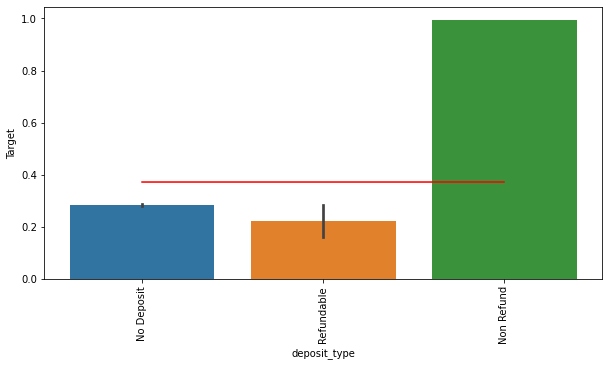

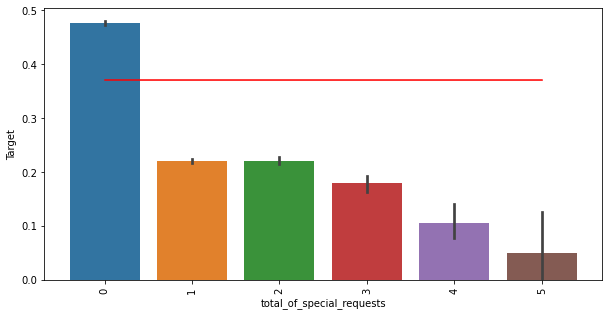

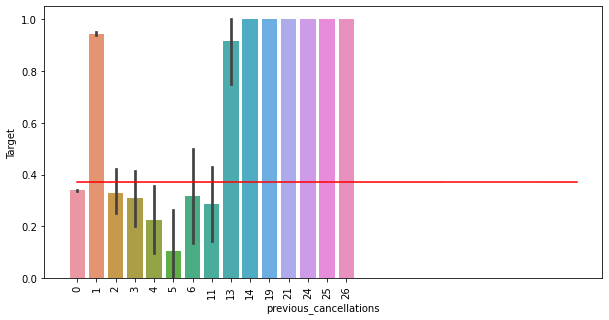

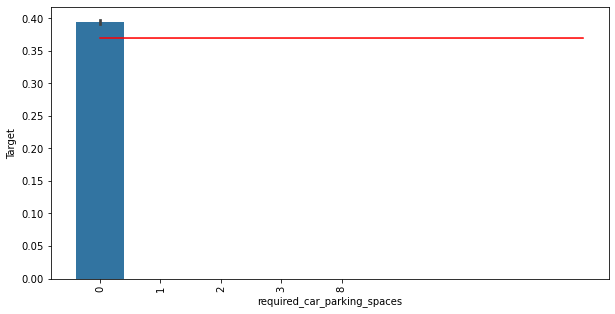

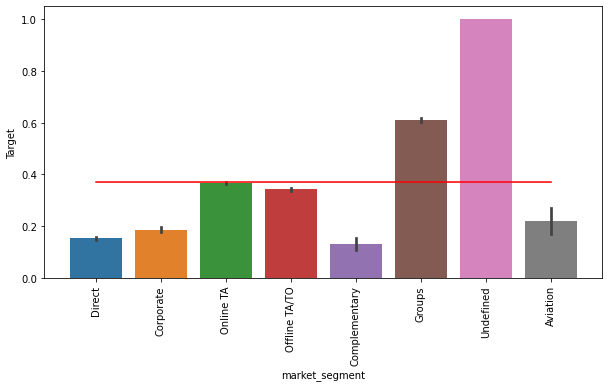

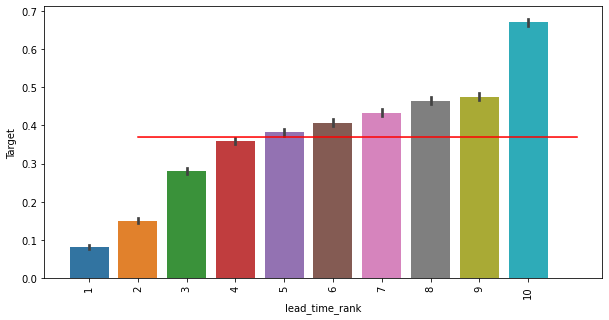

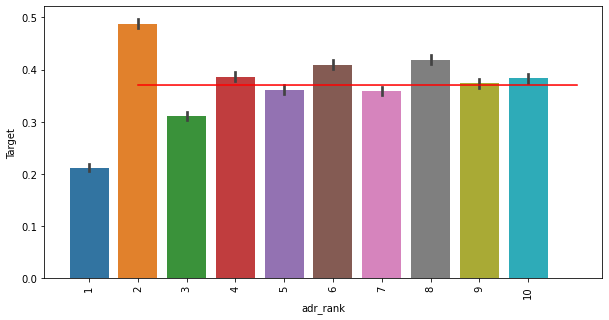

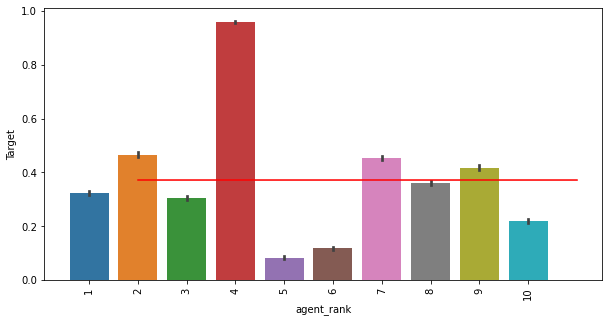

In [104]:
# total_columns = d4Hotel.columns
# print(total_columns)

d4Hotel['lead_time_rank'] = pd.qcut(d4Hotel['lead_time'].rank(method='first').values, 10, duplicates='drop').codes+1
d4Hotel['adr_rank'] = pd.qcut(d4Hotel['adr'].rank(method='first').values, 10, duplicates='drop').codes+1
d4Hotel['agent_rank'] = pd.qcut(d4Hotel['agent'].rank(method = 'first').values, 10, duplicates = 'drop').codes+1

action_features = ['deposit_type', 'total_of_special_requests', 'previous_cancellations',
                  'required_car_parking_spaces', 'market_segment', 'lead_time_rank', 'adr_rank', 'agent_rank']


for col in action_features:
    plt.figure(figsize = (10,5))
    sns.barplot(data = d4Hotel, x = col, y = 'Target', estimator = mean)
    sns.lineplot(data = d4Hotel, x = col, y = d4Hotel['Target'].mean(), color = 'red')
    plt.xticks(rotation = 90)
    plt.show()



#### Suggestions / Plan of Action

1. As regards to Non Refund deposit type - it is very surprising to see customers with Non Refundable deposit type have the most cancellations among the deposit type group. So much so the mean event rate is 99+%!!! This is counter-intuitive since we could imagine someone who has paid a deposit would NOT want to cancel for fear of losing the deposit. It definitely merits digging deeper - 

- Need to check if there is an error in data capture and/or labelling of the data i.e. non refund type should actually be no deposit and vice versa. 

- If there is no error, then it is important to understand WHY since no plausible explanation is apparent at this time. It is unlikely that it is a co-incidental correlation. 

#### Till such time as this point is discussed - the model CANNOT be put into production. The options are : 

###### a. To assume correctness of data. However, doing so would invariably result in the model making incorrect predictions sooner or later. 

###### b. To remove the feature from the model. However, if in fact, the labels were only incorrect - we would be losing a feature that has the greatest impact on prediction(once the labels are corrected - the feature would still have very high prediction value albeit in the other direction). 

###### Only after resolution of either option a or b can a final model be developed and deployed. 

2. Total_special_requests - from the graph we can see that total special requests are inversely proportional to the cancellation i.e. the lesser the requests, the higher the cancellation. This may just be a sign that customers who intend to cancel dont bother with special requests. Conversely, it would do no harm to try and engage customers and push for special requests at the time of booking. It may be creating a level of engagement which may psychologically disuade customers from cancelling at a later point. Administration and marketing need to come up with a strategy to do so and track improvement in cancellations if the strategy works. 

3. Lead_time - as lead time increases, so does the cancellation. This may again be more result than cause. But it would be a good idea to limit lead time ahead of arrival date while making a booking. This can be discussed with marketing and administration departments to come up with a viable strategy without impacting current state of bookings. 

4. Agents falling in the 4th decile have a much higher rate of cancellation. From the dataframe identify and monitor the agents falling in this decile and try and evaluate the reason for higher cancellation rate. 

5. ADRs falling in the 2nd decile have a much higher incidence of cancellation. Further data-analysis is required to identify the zone where ADRs result in higher cancellations (and correpsond it with room types and other services availed). 

6. Previous cancellations shows that customers who have cancelled once before OR have 13 or higher cancellations(probably corporate, group or agents as clients) have higher incidence of repeated cancellations. Monitoring of clients who have cancelled at least once is required to quickly identify clients likely to cancel again. Further, clients with high cancellations (13 or above) need to be identified and need to be worked with to understand the reasons for high cancellation incidences and improvement in these areas is required. 

7. Groups and Undefined market segment bookings have high cancellations. These need to be monitored continuously and a plan for engagement to avoid cancellations needs to be developed.

8. Clients who have not booking parking spaces are highly likely to cancel. As a sub-category of total_special_requests - offers for parking spaces can help build client engagement and reduce cancellations.

#### Services that may show room for improvement

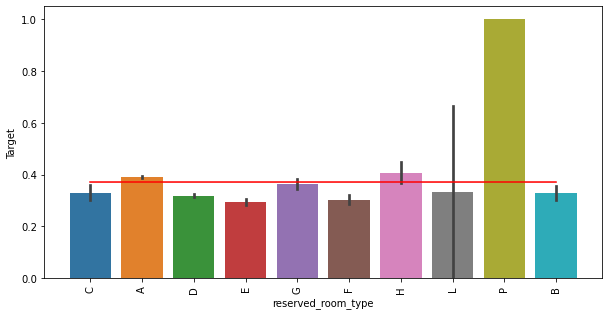

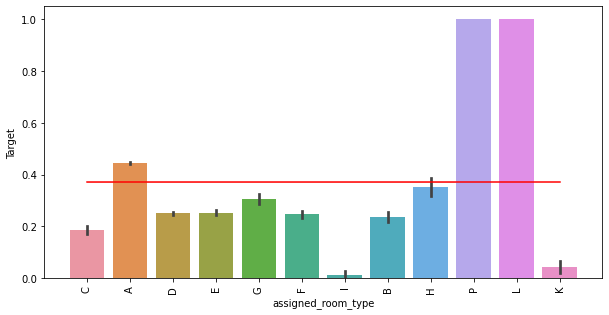

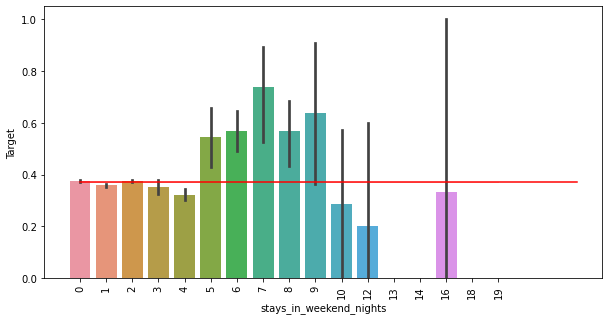

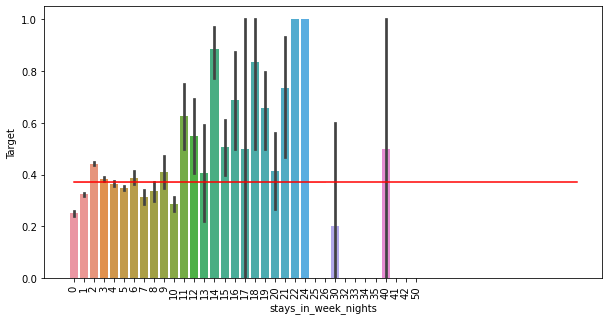

In [108]:
services_list = ['reserved_room_type', 'assigned_room_type', 'stays_in_weekend_nights', 'stays_in_week_nights']
for col in services_list:
    plt.figure(figsize = (10,5))
    sns.barplot(data = d4Hotel, x = col, y = 'Target', estimator = mean)
    sns.lineplot(data = d4Hotel, x = col, y = d4Hotel['Target'].mean(), color = 'red')
    plt.xticks(rotation = 90)
    plt.show()

#### Observations

##### 1. P Type rooms booked show a very high rate of cancellation indicating customers change their minds about these kinds of rooms the most. Identify P type rooms(budget, quality of the rooms, service, floor, location) to identify the cause(s) of cancellations.
##### 2. Customers assigned P type(which we already know have high cancellations from booking itself) and L type (which seem to be after customers check in - not sure, need more insight from business on the working of room assignments) - have very high cancellations. 

##### For point 1 and 2 - identifying the underlying causes and improving customer satisfaction on these actionable points is a priority. 

##### 3. Stays in weekend nights show above average cancellations starting from 5 weekends onwards. Further data analysis is required if it is the same customers staying through 5 weeks(including weekdays and weekends) or customers who only visit for the weekend and book in this hotel. After 4 weekends spent at the hotel - why is it that customers end up cancelling further reservations - 

###### - Is it that they dont have anything new at the hotel to keep them engaged? What services would keep them further engaged?
###### - Are there rivals in the vicinity who grab customers interests?
###### - Or is it normal change of travel plans since 5 weeks is a long period of time travelling.


##### 4. Similar to stays in weekend nights - cancellations start piling up once a customer has booked for 10 days or higher. Action points are the same as point 3. 


## In conclusion, this model is not ready for deployment. On verification of the issue of refund type with business, model can be adjusted and deployed with minor tweaks and rework.